In [303]:
import numpy as np 

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.pipeline import Pipeline

from imblearn.pipeline import Pipeline as ImbPipeline

from imblearn.over_sampling import SMOTE

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.svm import SVC

from sklearn.inspection import permutation_importance

from xgboost import XGBClassifier

from lightgbm import LGBMClassifier

from sklearn.metrics import f1_score, recall_score, make_scorer, auc, roc_curve, classification_report, ConfusionMatrixDisplay, precision_recall_curve, average_precision_score

import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)



### Data Preparation

#### Data Cleaning 

In [304]:
# Opening the csv file

df = pd.read_csv(r'dataset.csv')

df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [305]:
# Get Dataset information

df.info(max_cols = None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [306]:
# Get Data shape 

shape = df.shape 

print(f'The Dataset has {shape[0]} Rows and {shape[1]} Columns')

The Dataset has 1470 Rows and 35 Columns


In [307]:
# Check for Empty cells

df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [308]:
# Check for Null Values

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [309]:
# Check for Duplicates

df.duplicated().sum()

np.int64(0)

In [310]:
df['StockOptionLevel'].value_counts()

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

In [311]:
# Get the Value Count of each Column

df.nunique().sort_values()


EmployeeCount                  1
Over18                         1
StandardHours                  1
Attrition                      2
OverTime                       2
PerformanceRating              2
Gender                         2
BusinessTravel                 3
Department                     3
MaritalStatus                  3
RelationshipSatisfaction       4
StockOptionLevel               4
JobSatisfaction                4
EnvironmentSatisfaction        4
JobInvolvement                 4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

#### Data Categorization

##### Redundancy Check

In [312]:
# Get redundant columns

redundant_cols = []

for col in df.columns.tolist() :
     if df[col].value_counts().nunique() == 1 :
        redundant_cols.append(col)
        
redundant_cols

['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']

In [313]:
# Remove redundancy

df.drop(columns = redundant_cols, inplace = True)

len(df.columns)


31

##### Columns check

In [314]:
# Check for Numerical Columns 

numerical_cols = df.select_dtypes(include = 'number').columns.tolist()

print(str( len(numerical_cols) ) + ' Numerical Columns \n \n' + str(numerical_cols) )

23 Numerical Columns 
 
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [315]:
# Check for Categorical Columns

nominal_cols = df.select_dtypes( include = ['object'] ).columns.tolist()

print(str( len(nominal_cols) ) + ' Nominal Categorical Columns \n \n' + str(nominal_cols) )

8 Nominal Categorical Columns 
 
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [316]:
# Get Ordinal categorical columns

ordinal_cols = df[['Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']].columns.tolist()

print(str( len(ordinal_cols) ) + ' Ordinal Categorical Columns \n \n' + str(ordinal_cols) )

9 Ordinal Categorical Columns 
 
['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']


In [317]:
# Encode Overtime and Attrition

df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No' : 0})

df['Attrition'] = df['Attrition'].map({ 'Yes': 1, 'No': 0 })

In [318]:
# Updated dataset size 

shape = df.shape 

print(f'The Dataset now has {shape[0]} Rows and {shape[1]} Columns after removing Redundancies')

The Dataset now has 1470 Rows and 31 Columns after removing Redundancies


In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

### Exploratory Data Analysis

In [320]:
def Column_Attr(col):
    col_Attr = pd.crosstab(df[col], df['Attrition'], normalize='index') * 100
    col_Attr.columns = ['No (0)', 'Yes (1)']
    print(f"\n{col} vs Attrition (%): \n")
    print(col_Attr)

#### General Correlation Analysis

In [321]:
# Copy and Encode df 

df_copy = df.copy()

for col in ordinal_cols and numerical_cols and nominal_cols:
        df_copy[col] = LabelEncoder().fit_transform(df_copy[[col]])
        


In [322]:
df_copy.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0


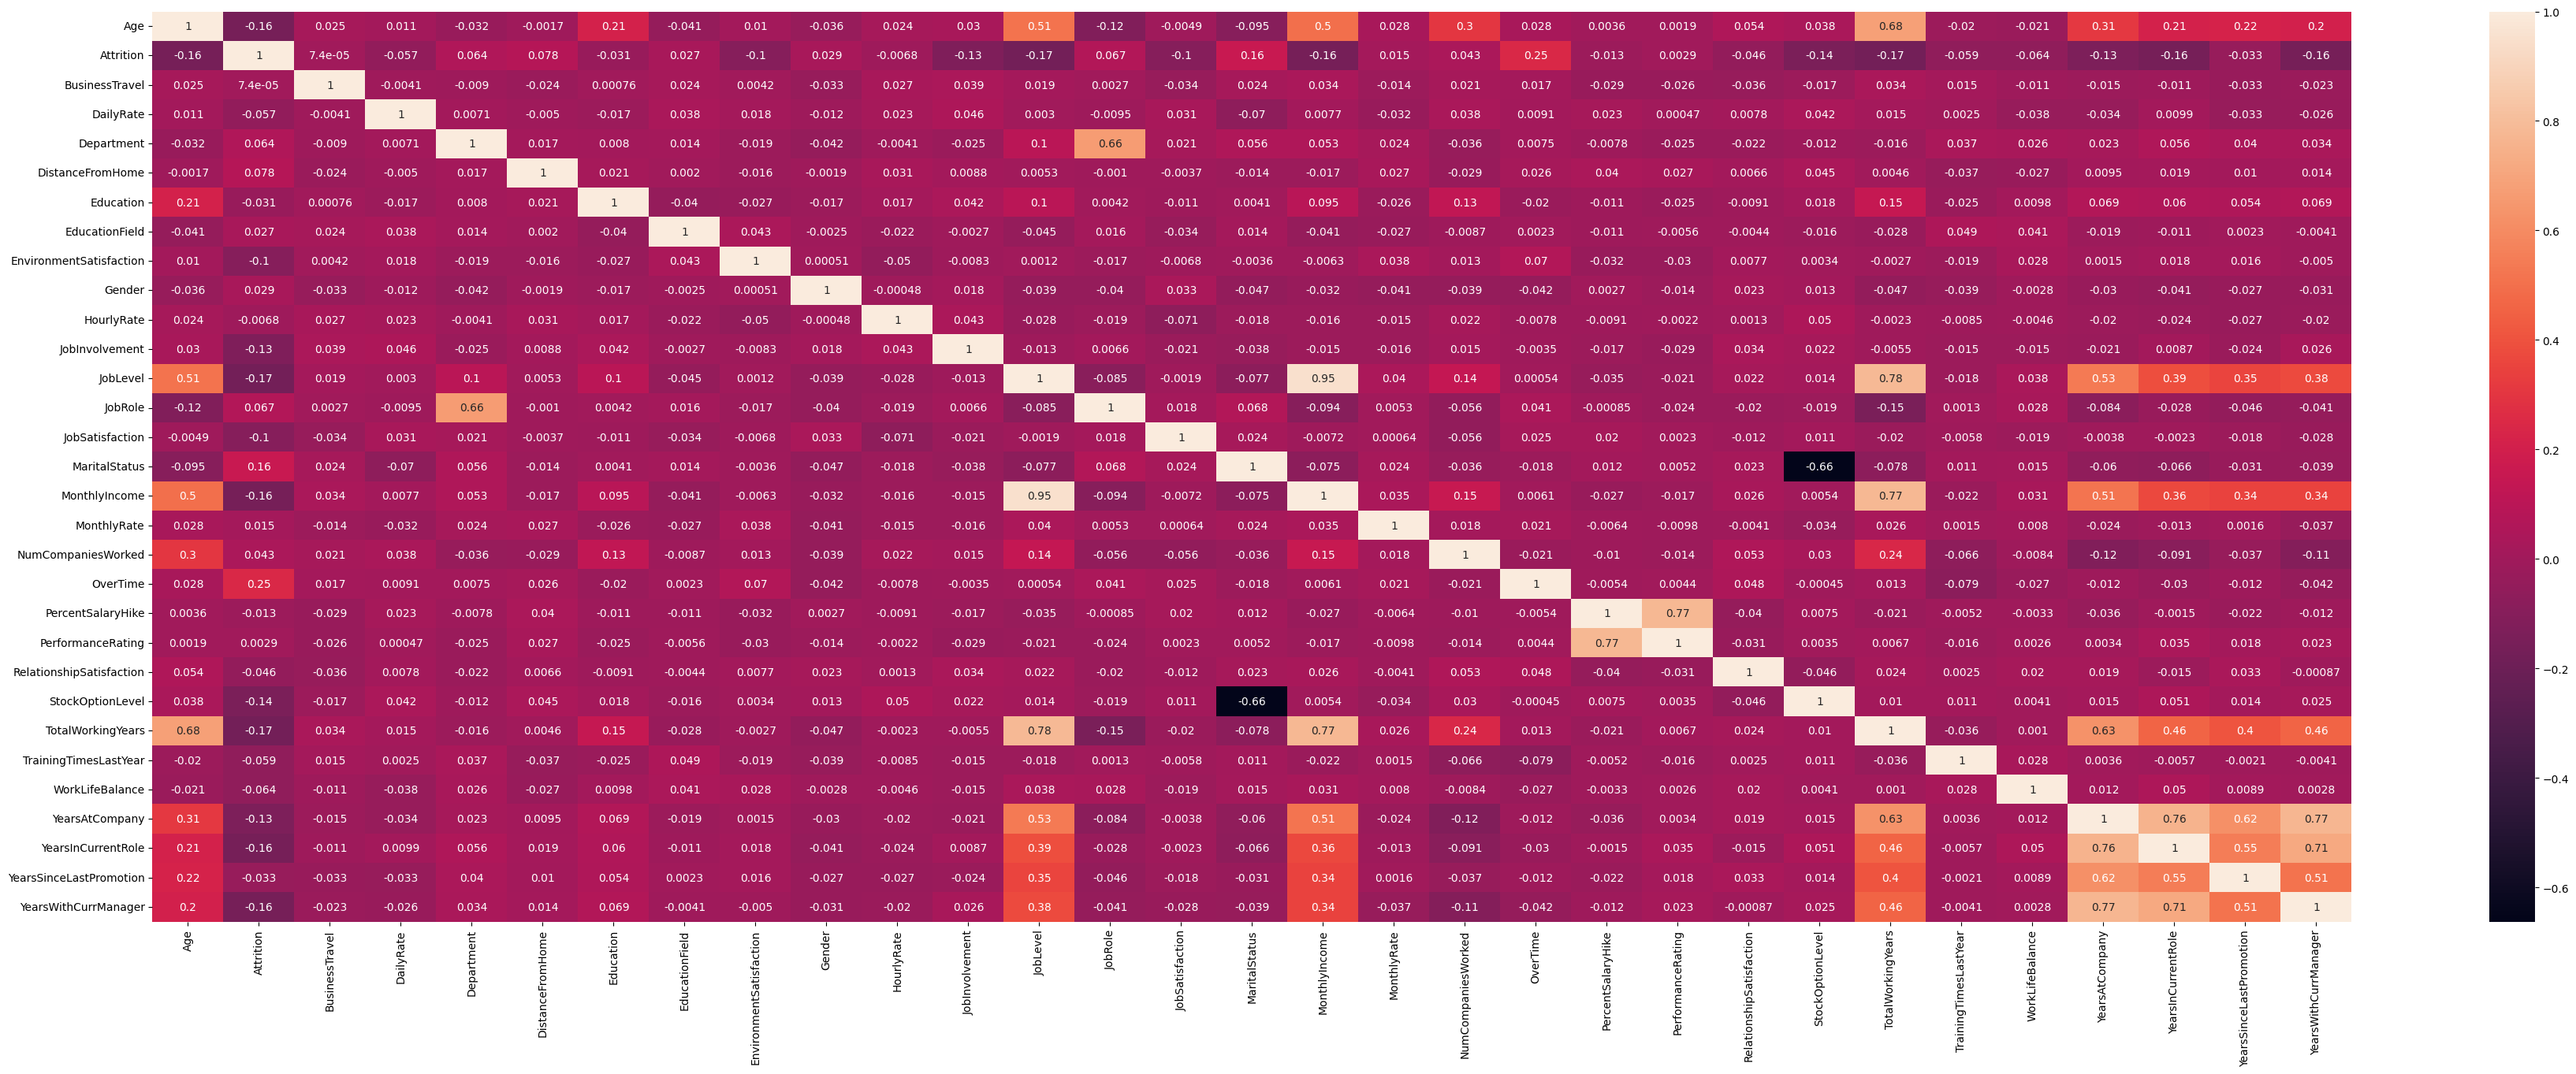

In [323]:
# Plot a correlation chart of df features 

df_encoded_corr = df_copy.corr()

plt.figure(figsize = (45, 15))

sns.heatmap(df_encoded_corr, annot = True)

plt.show()

In [324]:
# List out the correlation of each feature with Attrition

df_corr_list = df_encoded_corr['Attrition'].sort_values(ascending = True ).reset_index()

df_corr_list

,index,Attrition
0,TotalWorkingYears,-0.171063
1,JobLevel,-0.169105
2,YearsInCurrentRole,-0.160545
3,MonthlyIncome,-0.159840
4,Age,-0.159205
5,YearsWithCurrManager,-0.156199
6,StockOptionLevel,-0.137145
7,YearsAtCompany,-0.134392
8,JobInvolvement,-0.130016
9,JobSatisfaction,-0.103481


 From the `Correlation Chart of df`, it is evident that individually, none of the features correlate highly with the target `Attrition` 

#### Attrition

In [325]:
df['Attrition'].value_counts(normalize=True)

Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64

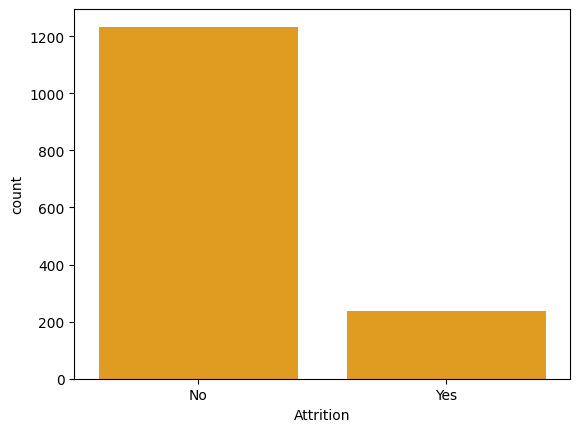

In [326]:
sns.countplot(data = df, x = 'Attrition', color = 'orange')

plt.xticks(ticks = [0,1], labels = ['No', 'Yes'])
plt.show()

#### Age 

In [327]:
df['Age'].value_counts()

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
28    48
27    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
48    19
51    19
53    19
54    18
52    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64

##### Univariate Analysis

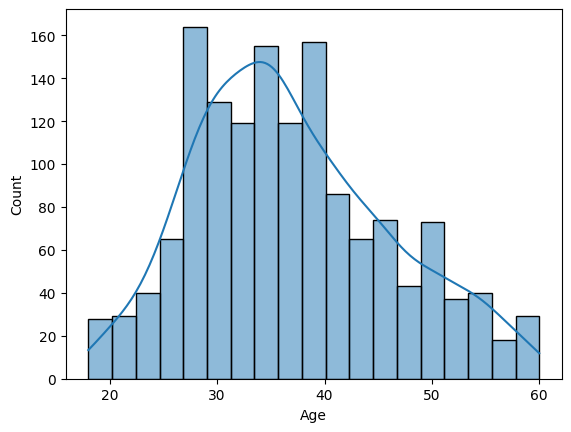

In [328]:
sns.histplot(data = df, x = 'Age', kde=True)


plt.show()

##### Bivariate Analysis

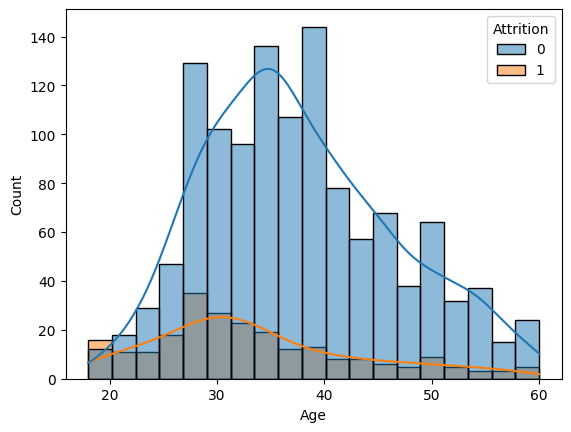

In [329]:
sns.histplot(data = df, x = 'Age', hue ='Attrition', kde=True)

plt.show()

In [330]:
Age_group = pd.cut(df['Age'], bins = [18, 20, 30, 40, 50, 60 ], labels = ['18 - 20', '21 - 30', '31 - 40', '41 - 50', '51 - 60'])

Age_group

0       41 - 50
1       41 - 50
2       31 - 40
3       31 - 40
4       21 - 30
         ...   
1465    31 - 40
1466    31 - 40
1467    21 - 30
1468    41 - 50
1469    31 - 40
Name: Age, Length: 1470, dtype: category
Categories (5, object): ['18 - 20' < '21 - 30' < '31 - 40' < '41 - 50' < '51 - 60']

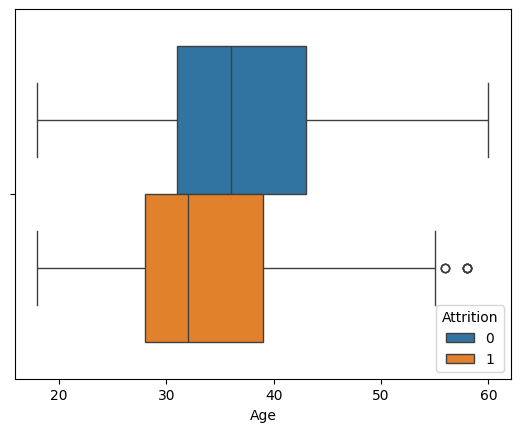

In [331]:
sns.boxplot(data = df, x = 'Age', hue ='Attrition')

plt.show()

> ##### Most employees are between 25–40 years old.
> ##### Insight: 
> ##### Younger employees (<30) have higher attrition; mid-career employees (30–45) are more stable, while attrition slightly rises again approaching retirement due to voluntary exits.

#### Business Travel

In [332]:
Business_Travel = df['BusinessTravel'].value_counts()

Business_Travel.reset_index()

,BusinessTravel,count
0,Travel_Rarely,1043
1,Travel_Frequently,277
2,Non-Travel,150


##### Univariate Analysis : Distribution of Business Travel

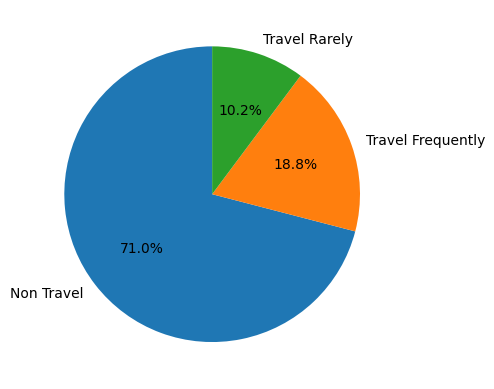

In [333]:
# Distribution of Business Travel categories 
labels = ['Non Travel', 'Travel Frequently', 'Travel Rarely']

plt.pie(Business_Travel, labels = labels, autopct='%1.1f%%', startangle=90)

plt.show()

##### Bivariate Analysis : Business Travel X Attrition


BusinessTravel vs Attrition (%): 

                      No (0)    Yes (1)
BusinessTravel                         
Non-Travel         92.000000   8.000000
Travel_Frequently  75.090253  24.909747
Travel_Rarely      85.043145  14.956855


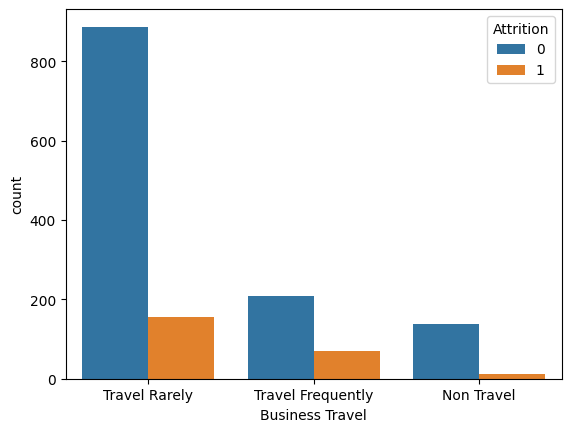

In [334]:
Column_Attr('BusinessTravel')

sns.countplot(data = df, x = 'BusinessTravel' , hue = 'Attrition' )
plt.xlabel('Business Travel')
plt.xticks(ticks=['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], labels=labels)
plt.show()

Generally, most employees `Rarely Travel`. 
Amongst those that ` Do Not Travel `, the numbers of employees who decided to stay is dominant. 
Amongst the employees that `Travel Frequently` , the attrition rate is higher.

#### Over Time 

In [412]:
df['OverTime'].value_counts()

OverTime
0    1054
1     416
Name: count, dtype: int64

##### Univariate Analysis

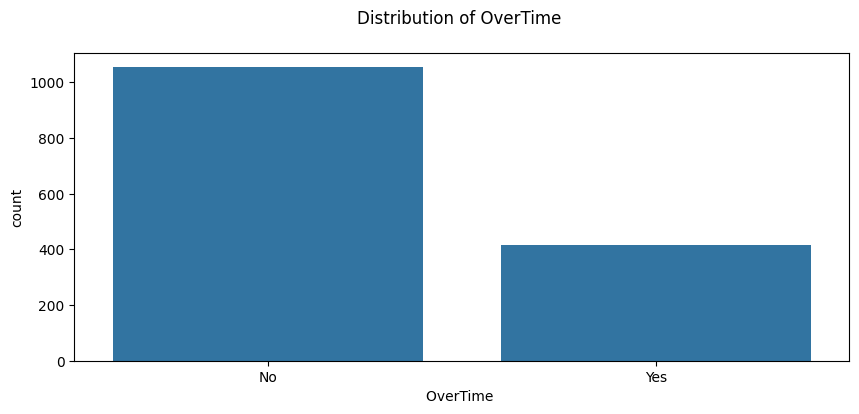

In [413]:
plt.figure(figsize = (10, 4))
sns.countplot(x=df['OverTime'])
plt.title('Distribution of OverTime \n')
plt.xlabel("OverTime ")
plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'])

plt.show()

##### Bivariate Analysis


OverTime vs Attrition (%): 

             No (0)    Yes (1)
OverTime                      
0         89.563567  10.436433
1         69.471154  30.528846


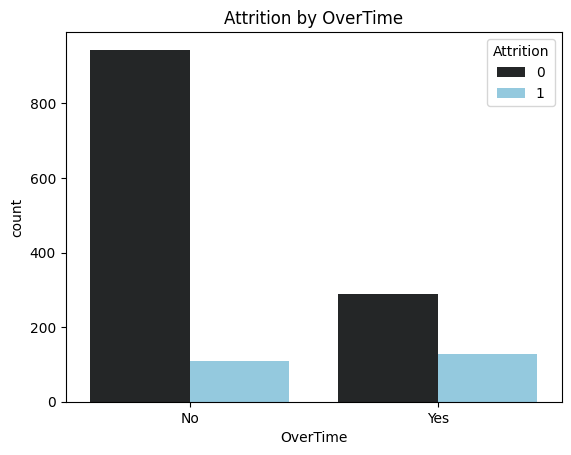

In [417]:
Column_Attr('OverTime')

sns.countplot(data=df, x='OverTime', hue='Attrition', color = 'skyblue')
plt.title('Attrition by OverTime')
plt.xticks(ticks = [0,1], labels = ['No','Yes'])
plt.show()

#### Department

##### Univariate Analysis : Distribution of Department

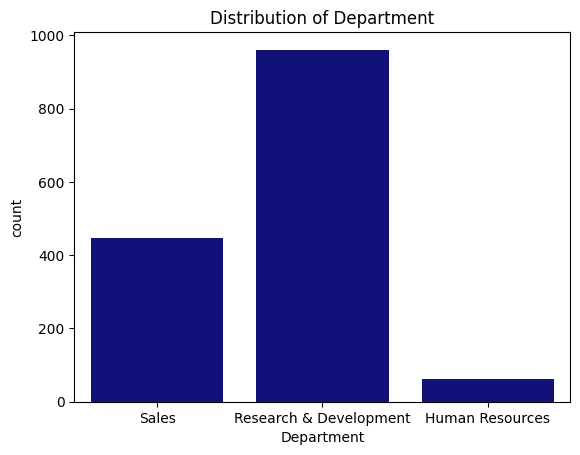


Department Counts: 

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


In [335]:
sns.countplot(data=df, x='Department', color='Darkblue')
plt.title('Distribution of Department')
plt.show()

print("\nDepartment Counts: \n")
print(df['Department'].value_counts())

##### Bivariate Analysis : Department X Attrition.


Department vs Attrition (%): 

                           No (0)    Yes (1)
Department                                  
Human Resources         80.952381  19.047619
Research & Development  86.160250  13.839750
Sales                   79.372197  20.627803


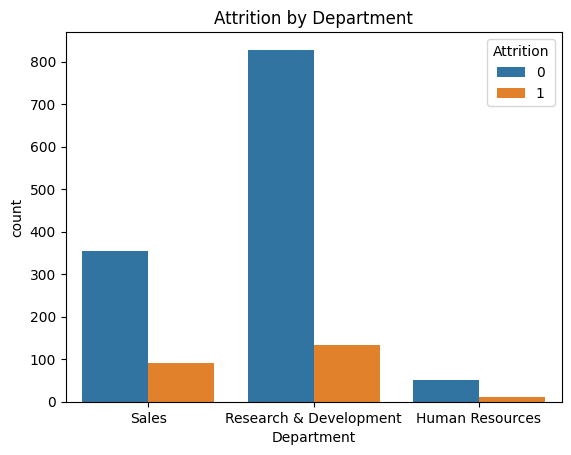

In [336]:
Column_Attr('Department')

sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.show()


#### Education

In [337]:
df['Education'].value_counts()

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

##### Univariate Analysis

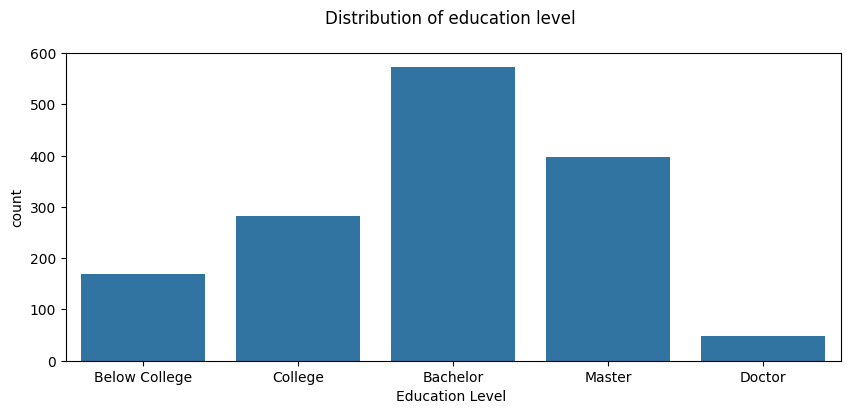

In [338]:
Edu_labels = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']

plt.figure(figsize = (10, 4))
sns.countplot(x=df['Education'])
plt.title('Distribution of education level \n')
plt.xlabel("Education Level ")
plt.xticks(ticks = [0, 1, 2, 3, 4], labels = Edu_labels)

plt.show()

##### Bivariate Analysis

In [339]:
pd.crosstab(df['Education'], df['Attrition'])

Attrition,0,1
Education,,
1,139,31
2,238,44
3,473,99
4,340,58
5,43,5



Education vs Attrition (%): 

              No (0)    Yes (1)
Education                      
1          81.764706  18.235294
2          84.397163  15.602837
3          82.692308  17.307692
4          85.427136  14.572864
5          89.583333  10.416667


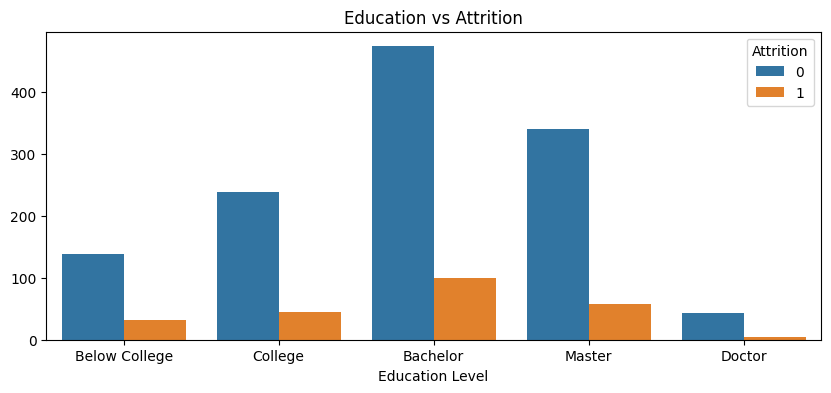

In [340]:
Column_Attr('Education')

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Education', hue='Attrition')
plt.title("Education vs Attrition")
plt.xlabel("Education Level")
plt.xticks(ticks = [0, 1, 2, 3, 4], labels = Edu_labels)
plt.ylabel("")
plt.show()



#### Job Involvement

#### Job Satisfaction

In [418]:
df['JobSatisfaction'].value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

##### Univariate Analysis

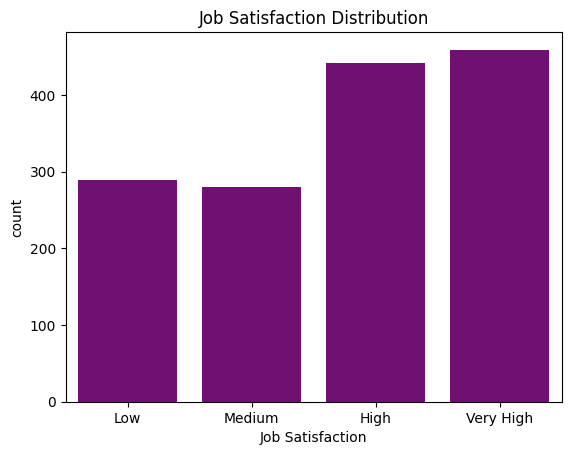

In [421]:
rank_labels = ['Low','Medium','High','Very High']
sns.countplot(data = df, x = 'JobSatisfaction', color='purple')

plt.title('Job Satisfaction Distribution')
plt.xlabel('Job Satisfaction')
plt.xticks(ticks = [0, 1, 2, 3], labels = rank_labels)
plt.show()

##### Bivariate Analysis


JobSatisfaction vs Attrition (%): 

                    No (0)    Yes (1)
JobSatisfaction                      
1                77.162630  22.837370
2                83.571429  16.428571
3                83.484163  16.515837
4                88.671024  11.328976


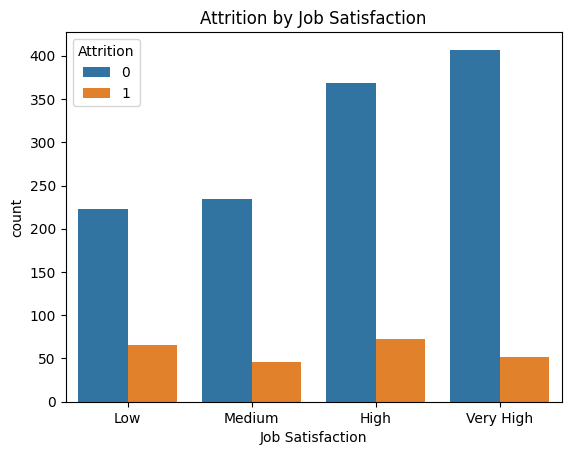

In [419]:
Column_Attr('JobSatisfaction')

sns.countplot(data = df, x = 'JobSatisfaction', hue = 'Attrition')

plt.title('Attrition by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.xticks(ticks = [0, 1, 2, 3], labels = rank_labels)
plt.show()

In [341]:
df['JobInvolvement'].value_counts()

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

##### Univariate Analysis

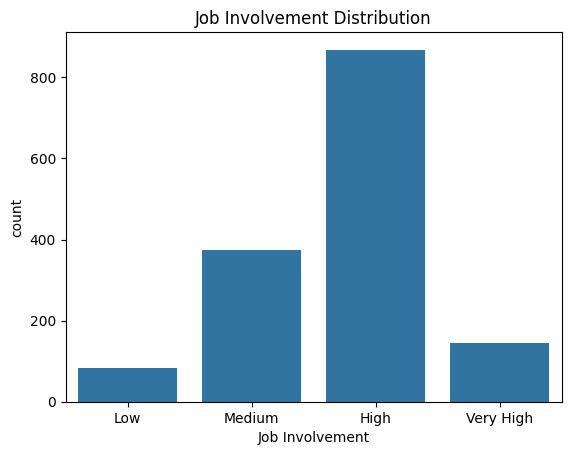

In [342]:
rank_labels = ['Low','Medium','High','Very High']
sns.countplot(data = df, x = 'JobInvolvement')

plt.title('Job Involvement Distribution')
plt.xlabel('Job Involvement')
plt.xticks(ticks = [0, 1, 2, 3], labels = rank_labels)
plt.show()

##### Bivariate Analysis


JobInvolvement vs Attrition (%): 

                   No (0)    Yes (1)
JobInvolvement                      
1               66.265060  33.734940
2               81.066667  18.933333
3               85.599078  14.400922
4               90.972222   9.027778


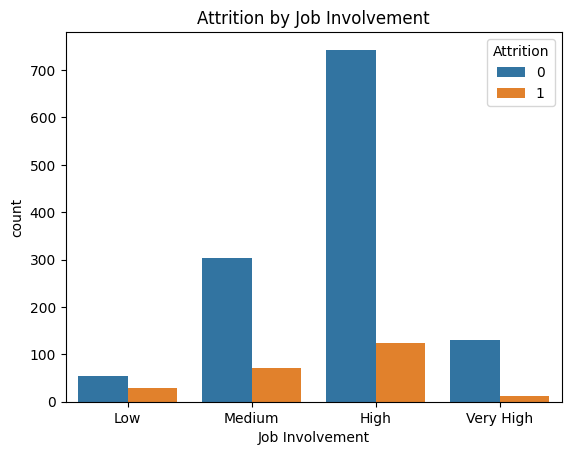

In [343]:
Column_Attr('JobInvolvement')

sns.countplot(data = df, x = 'JobInvolvement', hue = 'Attrition')

plt.title('Attrition by Job Involvement')
plt.xlabel('Job Involvement')
plt.xticks(ticks = [0, 1, 2, 3], labels = rank_labels)
plt.show()

#### Gender

In [344]:
df['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

##### Univariate Analysis

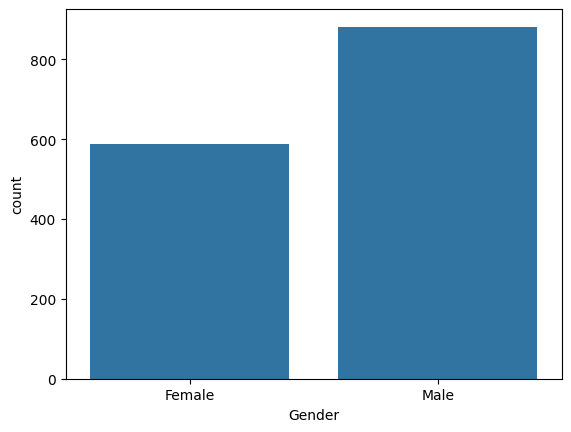

In [345]:
sns.countplot(data = df, x = 'Gender')

plt.show()


Gender vs Attrition (%): 

           No (0)    Yes (1)
Gender                      
Female  85.204082  14.795918
Male    82.993197  17.006803


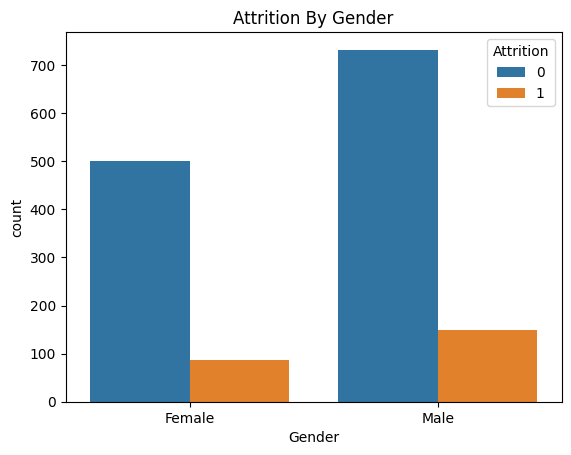

In [346]:
Column_Attr('Gender')

sns.countplot(data = df, x = 'Gender', hue = 'Attrition')
plt.title('Attrition By Gender')
plt.show()

#### Total Working Years

In [347]:
df['TotalWorkingYears'].value_counts()

TotalWorkingYears
10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
14     31
2      31
20     30
18     27
19     22
23     22
22     21
24     18
26     14
25     14
28     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: count, dtype: int64

##### Univariate Analysis 

Univariate Analysis: TotalWorkingYears 

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64


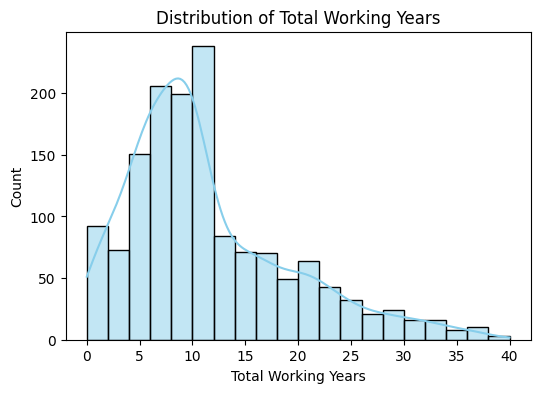

In [348]:
print("Univariate Analysis: TotalWorkingYears \n")
print(df['TotalWorkingYears'].describe())

plt.figure(figsize=(6,4))
sns.histplot(df['TotalWorkingYears'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Total Working Years")
plt.xlabel("Total Working Years")
plt.ylabel("Count")
plt.show()

#####  Bivariate Analysis

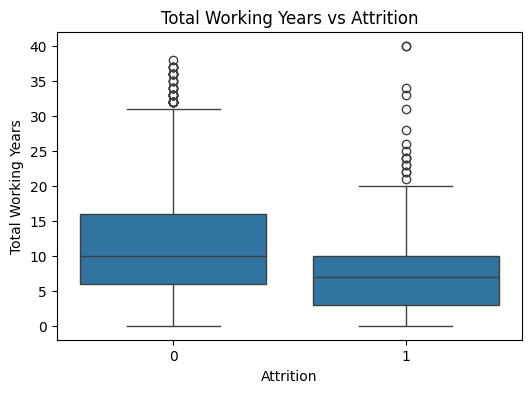

Average Total Working Years by Attrition:
Attrition
0    11.862936
1     8.244726
Name: TotalWorkingYears, dtype: float64
----------------------------------------


In [349]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df)
plt.title("Total Working Years vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Total Working Years")
plt.show()


print("Average Total Working Years by Attrition:")
print(df.groupby('Attrition')['TotalWorkingYears'].mean())
print("-"*40)

#### Work-Life Balance

In [350]:
df['WorkLifeBalance'].value_counts()

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

#####  Univariate Analysis


Univariate Analysis: WorkLifeBalance 

WorkLifeBalance
1     80
2    344
3    893
4    153
Name: count, dtype: int64


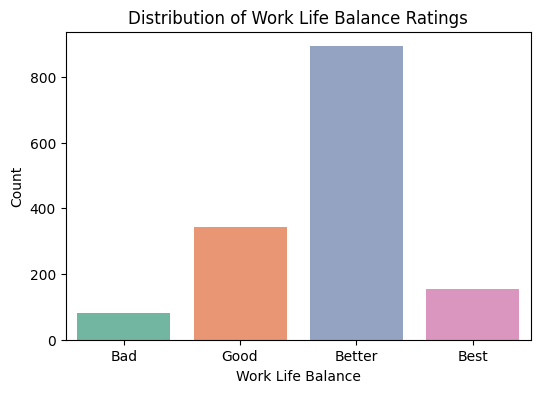

In [351]:
wlb_labels = ['Bad','Good','Better','Best']

print("\nUnivariate Analysis: WorkLifeBalance \n")
print(df['WorkLifeBalance'].value_counts().sort_index())

plt.figure(figsize=(6,4))
sns.countplot(x='WorkLifeBalance', data=df, palette='Set2')
plt.title("Distribution of Work Life Balance Ratings")
plt.xlabel("Work Life Balance")
plt.xticks(ticks=[0,1,2,3], labels = wlb_labels)
plt.ylabel("Count")
plt.show()


##### Bivariate Analysis


WorkLifeBalance vs Attrition (%): 

                    No (0)    Yes (1)
WorkLifeBalance                      
1                68.750000  31.250000
2                83.139535  16.860465
3                85.778275  14.221725
4                82.352941  17.647059


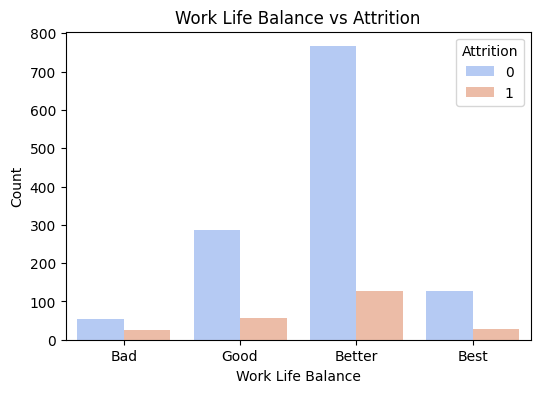

In [352]:
Column_Attr('WorkLifeBalance')

plt.figure(figsize=(6,4))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, palette='coolwarm')
plt.title("Work Life Balance vs Attrition")
plt.xlabel("Work Life Balance")
plt.xticks(ticks=[0,1,2,3], labels = wlb_labels)
plt.ylabel("Count")
plt.show()


#### Numbers of Companies Worked

##### Univariate Analysis : Distribution

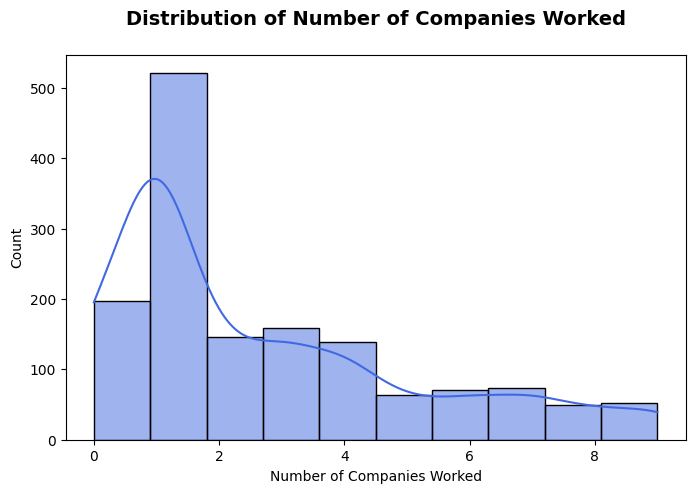

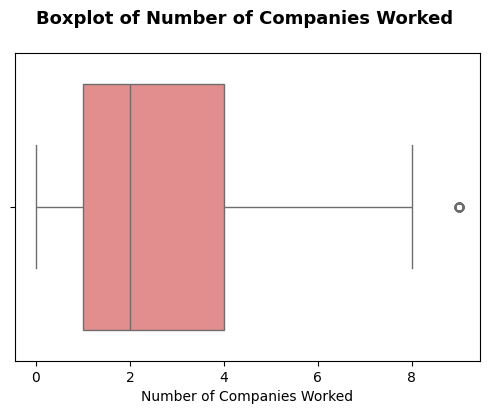

In [353]:
plt.figure(figsize=(8,5))
sns.histplot(df['NumCompaniesWorked'], bins=10, kde=True, color='royalblue')
plt.title('Distribution of Number of Companies Worked\n', fontsize=14, fontweight='bold')
plt.xlabel('Number of Companies Worked')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['NumCompaniesWorked'], color='lightcoral')
plt.title('Boxplot of Number of Companies Worked \n', fontsize=13, fontweight='bold')
plt.xlabel('Number of Companies Worked')
plt.show()

##### Bivariate Analysis


NumCompaniesWorked vs Attrition (%): 

                       No (0)    Yes (1)
NumCompaniesWorked                      
0                   88.324873  11.675127
1                   81.190019  18.809981
2                   89.041096  10.958904
3                   89.937107  10.062893
4                   87.769784  12.230216
5                   74.603175  25.396825
6                   77.142857  22.857143
7                   77.027027  22.972973
8                   87.755102  12.244898
9                   76.923077  23.076923


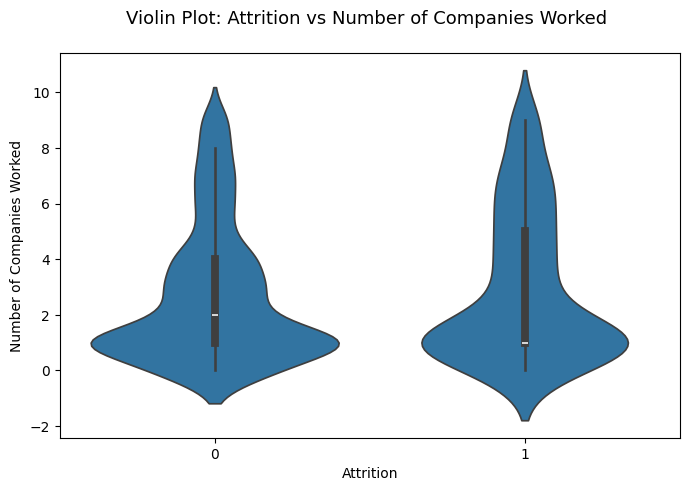

In [354]:
Column_Attr('NumCompaniesWorked')
plt.figure(figsize=(8,5))
sns.violinplot(x='Attrition', y='NumCompaniesWorked', data=df)
plt.title('Violin Plot: Attrition vs Number of Companies Worked \n', fontsize=13)
plt.xlabel('Attrition')
plt.ylabel('Number of Companies Worked')
plt.show()

#### Years In Current Role

##### Univariate Analysis

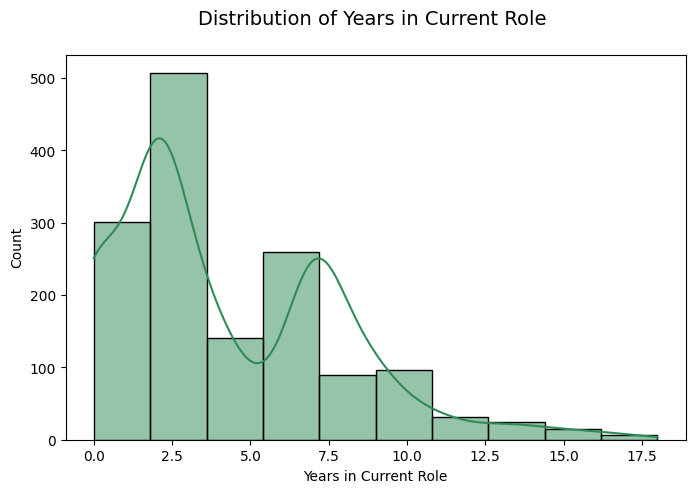

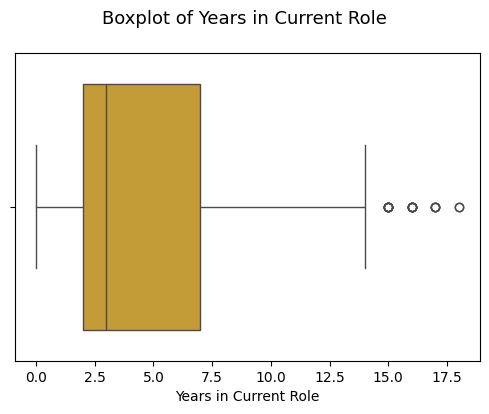

In [355]:
plt.figure(figsize=(8,5))
sns.histplot(df['YearsInCurrentRole'], bins=10, kde=True, color='seagreen')
plt.title('Distribution of Years in Current Role \n', fontsize=14, )
plt.xlabel('Years in Current Role')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['YearsInCurrentRole'], color='goldenrod')
plt.title('Boxplot of Years in Current Role \n', fontsize=13, )
plt.xlabel('Years in Current Role')
plt.show()

##### Bivariate Analysis

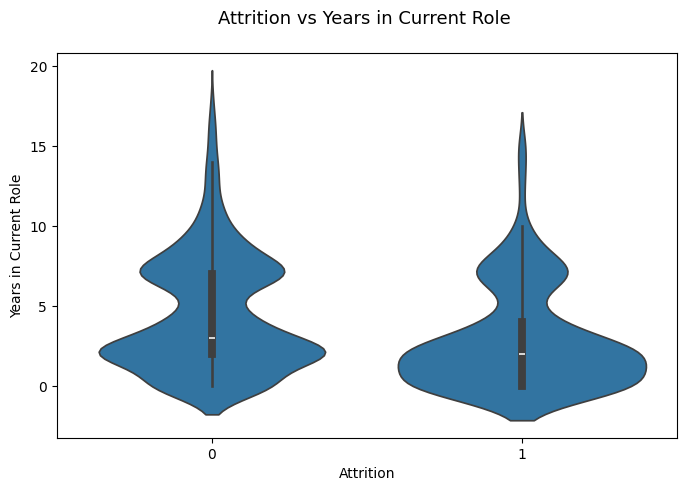

In [356]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Attrition', y='YearsInCurrentRole', data=df)
plt.title('Attrition vs Years in Current Role \n', fontsize=13)
plt.xlabel('Attrition')
plt.ylabel('Years in Current Role')
plt.show()

#### Years Since Last Promotion

##### Univariate Analysis : Distribution

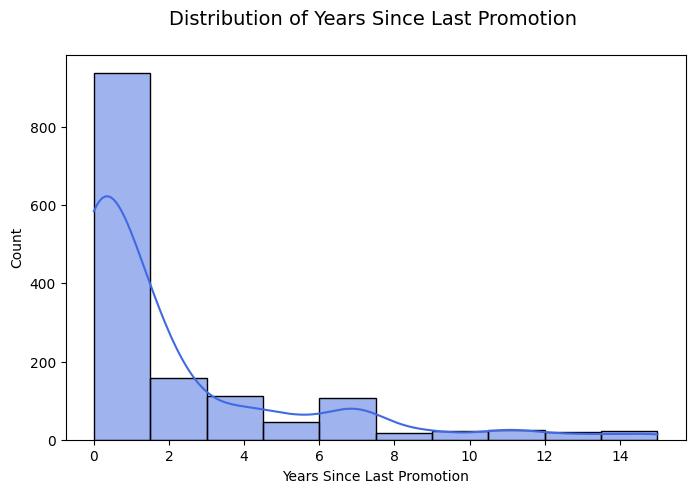

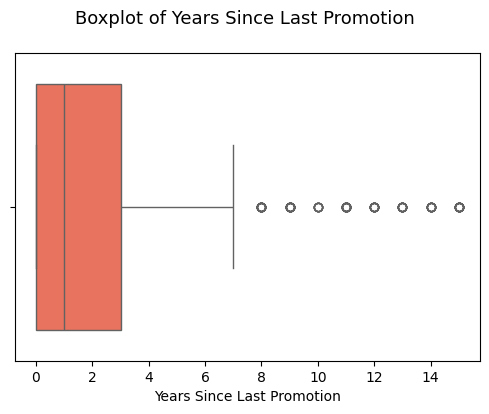

In [357]:
plt.figure(figsize=(8,5))
sns.histplot(df['YearsSinceLastPromotion'], bins=10, kde=True, color='RoyalBlue')
plt.title('Distribution of Years Since Last Promotion \n', fontsize=14)
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['YearsSinceLastPromotion'], color='tomato')
plt.title('Boxplot of Years Since Last Promotion \n', fontsize=13)
plt.xlabel('Years Since Last Promotion')
plt.show()

##### Bivariate Analysis : Years since last promotion X Attrition


YearsSinceLastPromotion vs Attrition (%): 

                             No (0)    Yes (1)
YearsSinceLastPromotion                       
0                         81.067126  18.932874
1                         86.274510  13.725490
2                         83.018868  16.981132
3                         82.692308  17.307692
4                         91.803279   8.196721
5                         95.555556   4.444444
6                         81.250000  18.750000
7                         78.947368  21.052632
8                        100.000000   0.000000
9                         76.470588  23.529412
10                        83.333333  16.666667
11                        91.666667   8.333333
12                       100.000000   0.000000
13                        80.000000  20.000000
14                        88.888889  11.111111
15                        76.923077  23.076923


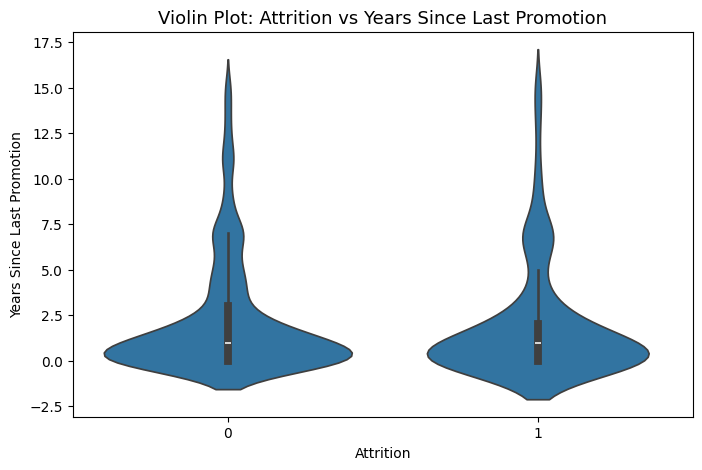

In [358]:
Column_Attr('YearsSinceLastPromotion')

plt.figure(figsize=(8,5))
sns.violinplot(x='Attrition', y='YearsSinceLastPromotion', data=df)
plt.title('Violin Plot: Attrition vs Years Since Last Promotion', fontsize=13)
plt.xlabel('Attrition')
plt.ylabel('Years Since Last Promotion')
plt.show()

### Multivariate Analysis

In [359]:
def VC_table(cols):
    table = df[cols].nunique().reset_index()
    table.columns = ['Column','Value Counts']
    
    print('Value Counts for each column of the combination')
    return table

1. Attrition By Job Satisfaction and Job Level

In [360]:
VC_table(['JobSatisfaction','JobLevel','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,JobSatisfaction,4
1,JobLevel,5
2,Attrition,2


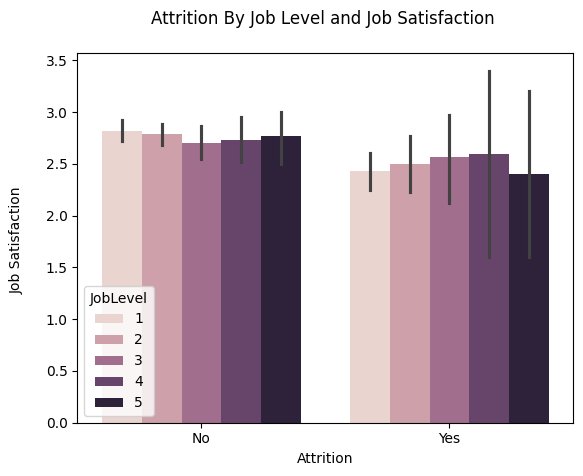

In [361]:
sns.barplot(y='JobSatisfaction', x='Attrition', hue='JobLevel', data=df)

plt.title('Attrition By Job Level and Job Satisfaction \n')
plt.ylabel('Job Satisfaction \n')
plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'])
plt.show()

2. Attrition By Overtime and Job Satisfaction

In [362]:
VC_table(['OverTime','JobSatisfaction','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,OverTime,2
1,JobSatisfaction,4
2,Attrition,2


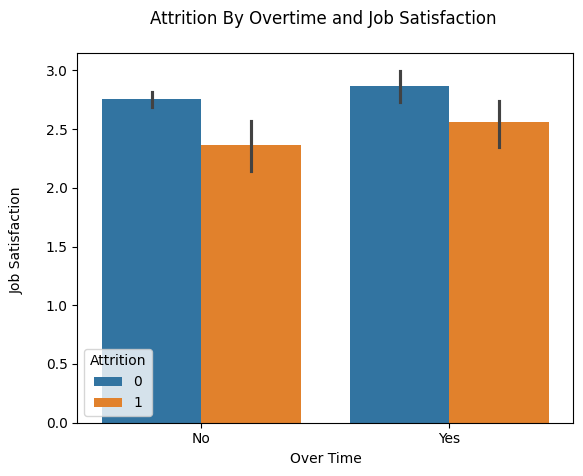

In [363]:
sns.barplot(data = df, x = 'OverTime', y ='JobSatisfaction', hue = 'Attrition')

plt.title('Attrition By Overtime and Job Satisfaction \n')
plt.ylabel('Job Satisfaction \n')
plt.xlabel('Over Time')

plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.show()


3. Attrition By Work-Life Balance and Job Satisfaction

In [364]:
VC_table(['WorkLifeBalance','JobSatisfaction','MaritalStatus','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,WorkLifeBalance,4
1,JobSatisfaction,4
2,MaritalStatus,3
3,Attrition,2


In [365]:
df[['WorkLifeBalance','JobSatisfaction', 'MaritalStatus', 'Attrition']].head(5)

,WorkLifeBalance,JobSatisfaction,MaritalStatus,Attrition
0,1,4,Single,1
1,3,2,Married,0
2,3,3,Single,1
3,3,3,Married,0
4,3,2,Married,0


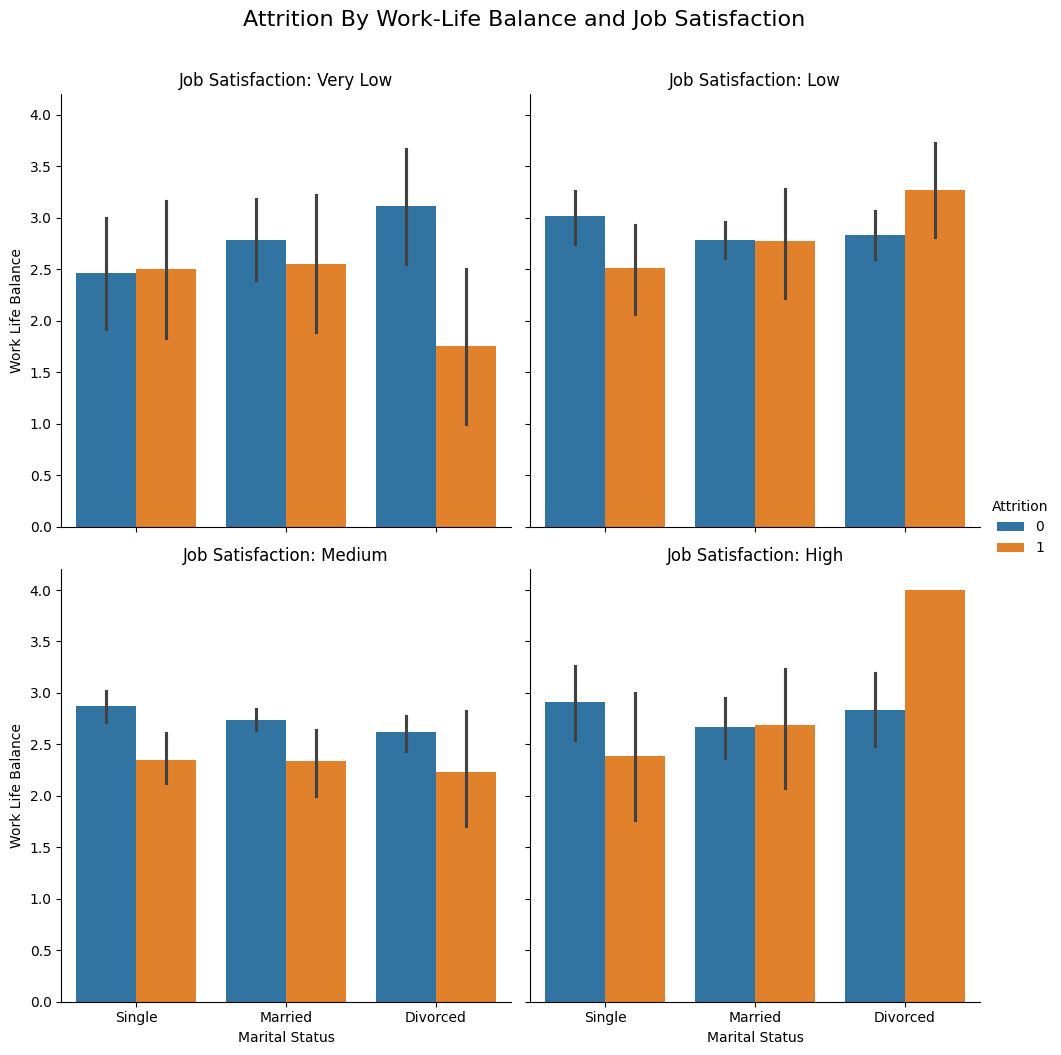

In [366]:
g = sns.catplot(data = df,kind = 'bar' , y = 'JobSatisfaction', col = 'WorkLifeBalance', x = 'MaritalStatus', hue ='Attrition', col_wrap=2)

satisfaction_labels = {
    1: "Very Low",
    2: "Low",
    3: "Medium",
    4: "High"
}

for ax, title in zip(g.axes.flat, g.col_names):
    ax.set_title(f"Job Satisfaction: {satisfaction_labels.get(title, title)}")

g.set_xlabels('Marital Status')
g.set_ylabels('Work Life Balance')
g.fig.suptitle("Attrition By Work-Life Balance and Job Satisfaction", fontsize=16, y=1.05)
plt.show()


4. Attrition By Years In current Role and Years Since Last promotion

In [367]:
VC_table(['YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,YearsInCurrentRole,19
1,YearsSinceLastPromotion,16
2,YearsWithCurrManager,18
3,Attrition,2


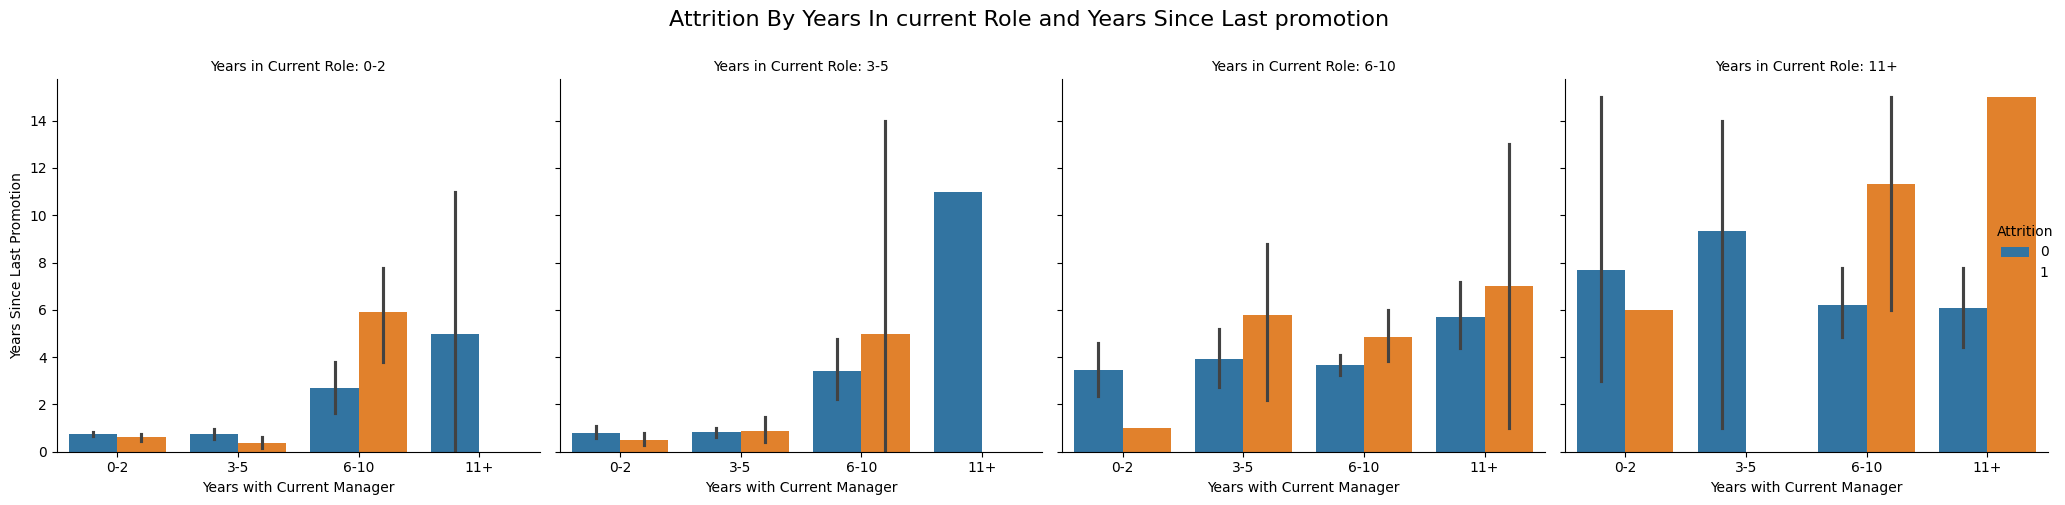

In [368]:
year_cols = df[['YearsInCurrentRole', 'YearsWithCurrManager']].columns.tolist()

test = {}

bin_edges = [0, 2, 5, 10, 20] 
bin_labels = ['0-2', '3-5', '6-10', '11+']

for col in year_cols:
    test[f'{col}_bin'] = pd.cut(
        df[col],
        bins=bin_edges,
        labels=bin_labels,
        include_lowest=True,
        right=True
    )
    

    
g = sns.catplot(data = test, kind = 'bar', x = 'YearsWithCurrManager_bin', y = df['YearsSinceLastPromotion'] , hue = df['Attrition'], col = 'YearsInCurrentRole_bin')

g.set_axis_labels("Years with Current Manager", "Years Since Last Promotion")

g.set_titles("Years in Current Role: {col_name}")

g.fig.suptitle('Attrition By Years In current Role and Years Since Last promotion', fontsize=16, y=1)
plt.tight_layout()
plt.show()

5. Average Monthly Income by Education and Attrition

In [369]:
test = pd.pivot_table(df, index = 'Education', columns= 'Attrition', values = 'MonthlyIncome', aggfunc='mean')

test

Attrition,0,1
Education,,
1,5926.129496,4360.161290
2,6586.058824,4282.545455
3,6882.919662,4770.242424
4,7087.814706,5335.155172
5,8559.906977,5850.200000


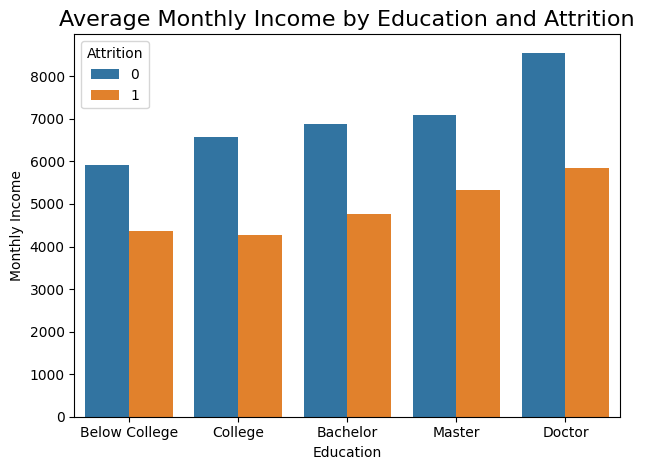

In [370]:
test_melted = test.reset_index().melt(id_vars='Education', value_name='MonthlyIncome', var_name='Attrition')

sns.barplot(data=test_melted, x='Education', y='MonthlyIncome', hue='Attrition')
plt.title('Average Monthly Income by Education and Attrition', fontsize=16)

plt.xticks(ticks=[0,1,2,3,4], labels = Edu_labels)
plt.ylabel('Monthly Income')
plt.tight_layout()
plt.show()



6. Attrition By Performance Rating and Job Involvement

In [371]:
VC_table(['PerformanceRating','JobInvolvement','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,PerformanceRating,2
1,JobInvolvement,4
2,Attrition,2


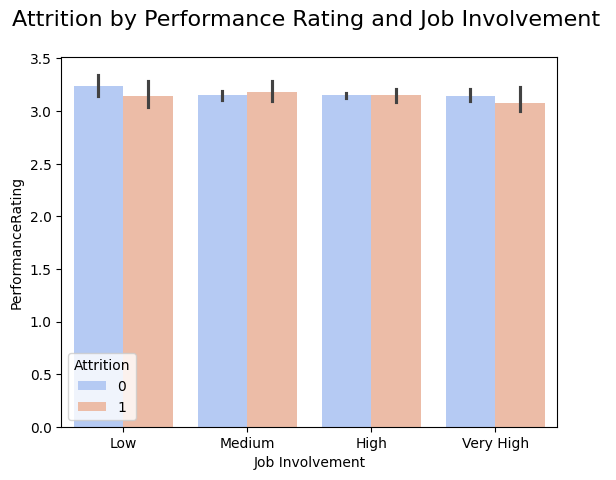

In [372]:
sns.barplot(data = df, x = 'JobInvolvement', hue = 'Attrition', y = 'PerformanceRating', palette='coolwarm')

plt.title('Attrition by Performance Rating and Job Involvement \n',fontsize=16)
plt.xlabel('Job Involvement')
plt.xticks(ticks=[0,1,2,3], labels = rank_labels)
plt.show()

7. Attrition by Job Satisfaction and Job Involvement

In [373]:
VC_table(['JobInvolvement','JobSatisfaction','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,JobInvolvement,4
1,JobSatisfaction,4
2,Attrition,2


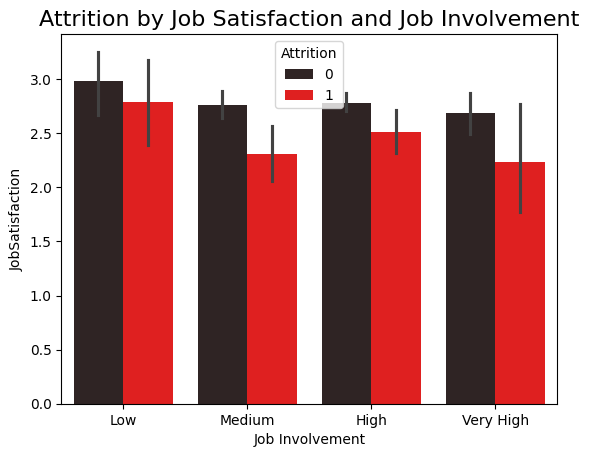

In [374]:
sns.barplot(data = df, x = 'JobInvolvement', y = 'JobSatisfaction', hue = 'Attrition', color='red')

plt.title('Attrition by Job Satisfaction and Job Involvement', fontsize=16)
plt.xticks(ticks=[0,1,2,3], labels = rank_labels)
plt.xlabel('Job Involvement')
plt.show()

8. Attrition By Numbers of companies worked and Total Working Years

In [375]:
VC_table(['NumCompaniesWorked','TotalWorkingYears','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,NumCompaniesWorked,10
1,TotalWorkingYears,40
2,Attrition,2


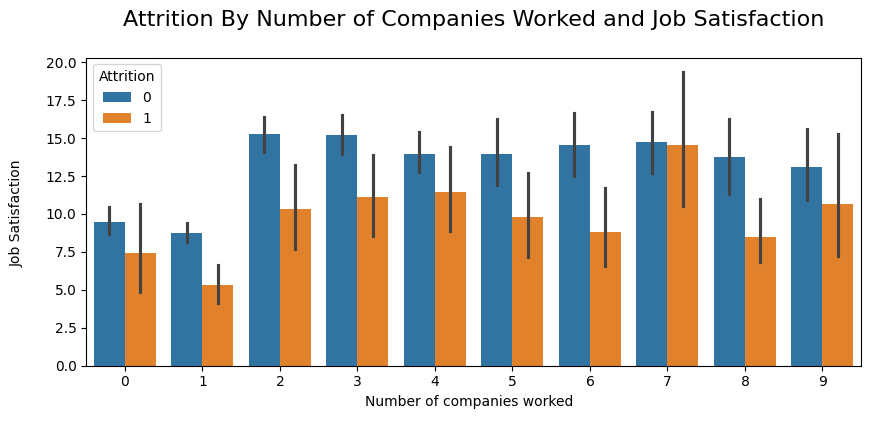

In [376]:
plt.figure(figsize = (10, 4))
sns.barplot(y='TotalWorkingYears', x='NumCompaniesWorked', hue='Attrition', data=df)

plt.title('Attrition By Number of Companies Worked and Job Satisfaction\n', fontsize=16)
plt.ylabel('Job Satisfaction \n')
plt.xlabel('Number of companies worked  \n')

plt.show()

9. Attrition by Environment Satisfaction and job Involvement 

In [377]:
VC_table(['EnvironmentSatisfaction','JobInvolvement','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,EnvironmentSatisfaction,4
1,JobInvolvement,4
2,Attrition,2


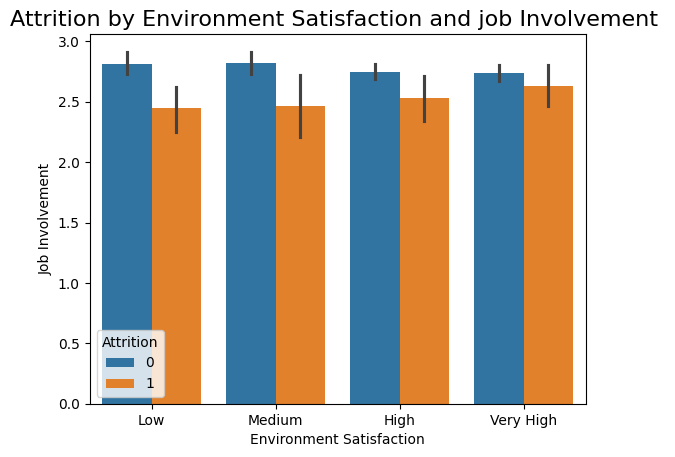

In [378]:
sns.barplot(data = df, x = 'EnvironmentSatisfaction', y = 'JobInvolvement', hue = 'Attrition')

plt.title('Attrition by Environment Satisfaction and job Involvement ', fontsize=16)
plt.xlabel('Environment Satisfaction')
plt.xticks(ticks=[0,1,2,3], labels = rank_labels)
plt.ylabel('Job Involvement')

plt.show()

10. Attrition by Business Travel and Marital Status

In [379]:
VC_table(['MaritalStatus','BusinessTravel','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,MaritalStatus,3
1,BusinessTravel,3
2,Attrition,2


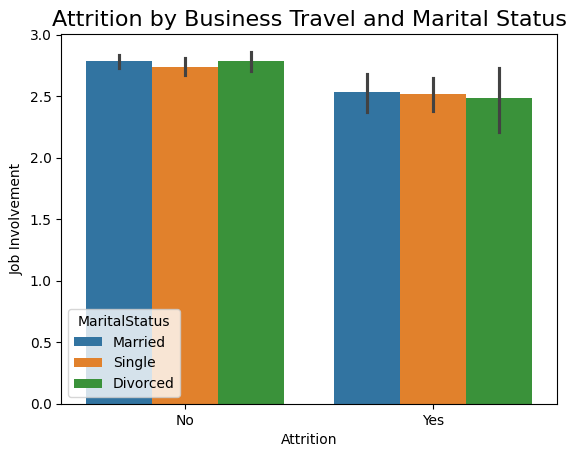

In [380]:
sns.barplot(data = df, x = 'Attrition', y = 'JobInvolvement', hue = 'MaritalStatus')

plt.title('Attrition by Business Travel and Marital Status', fontsize=16)
plt.xticks(ticks=[0,1], labels = ['No','Yes'])
plt.ylabel('Job Involvement')
plt.show()

11. Attrition by Department and Job Satisfaction

In [381]:
VC_table(['Department', 'JobSatisfaction', 'Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,Department,3
1,JobSatisfaction,4
2,Attrition,2


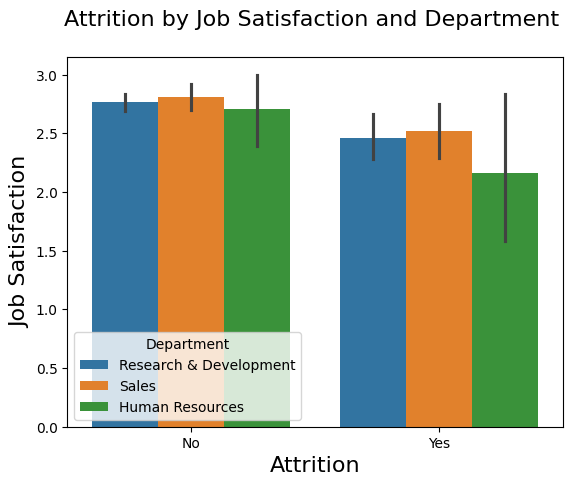

In [382]:
sns.barplot(data = df, x = 'Attrition', y = 'JobSatisfaction', hue = 'Department')

plt.title('Attrition by Job Satisfaction and Department \n', fontsize=16)
plt.ylabel('Job Satisfaction', fontsize=16)
plt.xlabel('Attrition', fontsize=16)
plt.xticks(ticks=[0,1], labels = ['No','Yes'])
plt.show()

12. Attrition by Training Time Last Year and Job Level

In [383]:
VC_table(['TrainingTimesLastYear', 'JobLevel', 'Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,TrainingTimesLastYear,7
1,JobLevel,5
2,Attrition,2


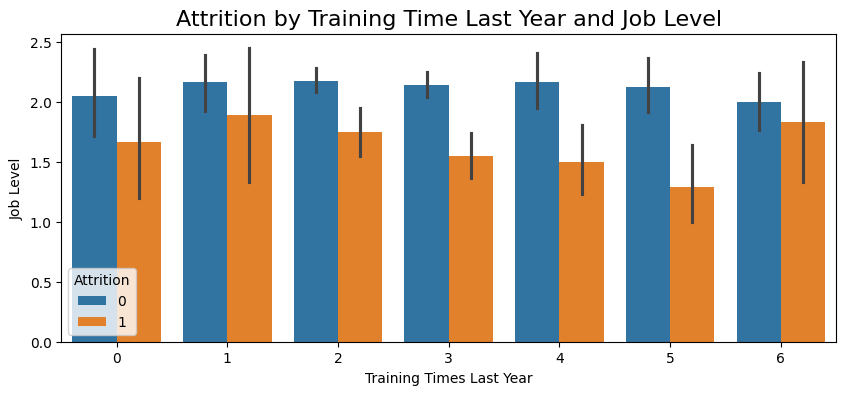

In [384]:
plt.figure(figsize = (10, 4))

sns.barplot(data = df, x = 'TrainingTimesLastYear', y = 'JobLevel', hue = 'Attrition')

plt.title('Attrition by Training Time Last Year and Job Level', fontsize = 16)
plt.xlabel('Training Times Last Year')
plt.ylabel('Job Level')
plt.show()

13. Attrition by Distance From Home and Job Satisfaction

In [385]:
VC_table(['DistanceFromHome', 'JobSatisfaction', 'Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,DistanceFromHome,29
1,JobSatisfaction,4
2,Attrition,2


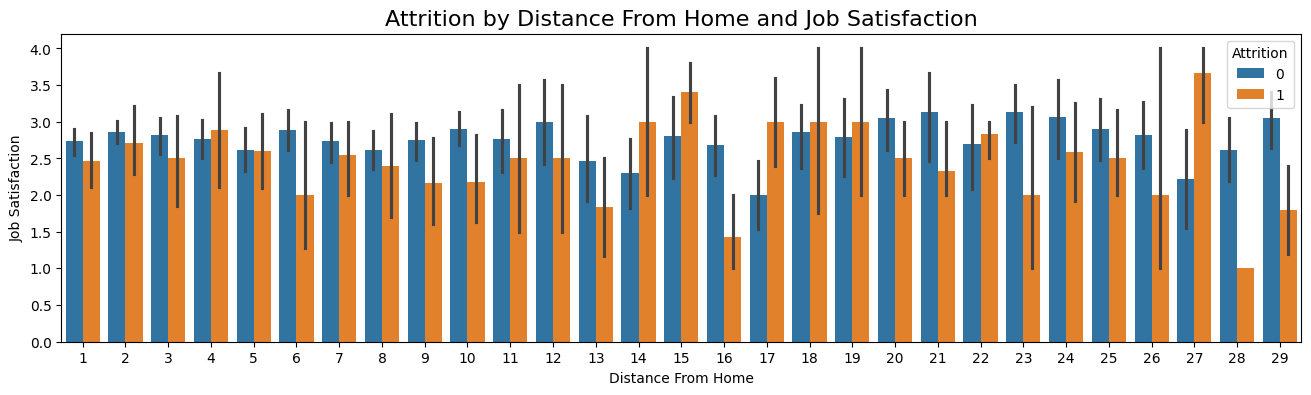

In [386]:
plt.figure(figsize = (16, 4))

sns.barplot(data = df, x = 'DistanceFromHome', y = 'JobSatisfaction', hue = 'Attrition')
plt.title('Attrition by Distance From Home and Job Satisfaction', fontsize = 16)
plt.xlabel('Distance From Home')
plt.ylabel('Job Satisfaction')
plt.show()

14. Attrition by Relationship Satisfaction and Job Satisfaction

In [387]:
VC_table(['RelationshipSatisfaction', 'JobSatisfaction', 'Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,RelationshipSatisfaction,4
1,JobSatisfaction,4
2,Attrition,2


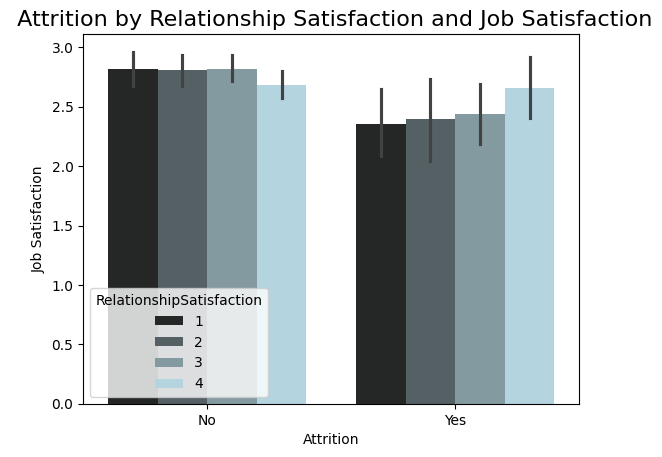

In [388]:
sns.barplot(data = df, x = 'Attrition', y = 'JobSatisfaction', hue = 'RelationshipSatisfaction', color='lightblue')

plt.title(' Attrition by Relationship Satisfaction and Job Satisfaction', fontsize = 16)
plt.ylabel('Job Satisfaction')
plt.xticks(ticks=[0,1], labels = ['No','Yes'])
plt.show()

### Feature Engineering

#### Feature Addition

In [389]:
df.shape

(1470, 31)

In [390]:
# Add Loyalty Feature 

df['Loyalty'] = round((df['YearsAtCompany'] / df['TotalWorkingYears']), 2)

df['Loyalty'].fillna(0, inplace=True)

df['Loyalty'].isnull().sum()

np.int64(0)

In [391]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Loyalty
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0.75
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1.00


In [392]:
print(df.shape)

(1470, 32)


#### Feature Selection

##### Define and Encode x

In [393]:
# Define x

x = df.drop( columns = ['Attrition','DailyRate', 'EducationField', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'Education', 'BusinessTravel','Gender','PerformanceRating','YearsAtCompany'])

x.shape

(1470, 21)

In [394]:
# Get the Numerial columns and Nominal Columns of x

x_numerical_cols = x.select_dtypes( include = 'number').columns.tolist()

x_non_ordinal_cols = x.select_dtypes(include = ['object']).columns.tolist()

print(str( len(x_non_ordinal_cols) ) + ' Categorical Columns of Independent Variable (x)  \n \n' + str(x_non_ordinal_cols) )

3 Categorical Columns of Independent Variable (x)  
 
['Department', 'JobRole', 'MaritalStatus']


In [395]:
# x Ordinal Columns 

x_ordinal_cols = [col for col in ordinal_cols if col in x.columns and col not in x_non_ordinal_cols]

print(f'Ordinal Columns of x : \n \n{x_ordinal_cols}')

print(f'\n Non-Ordinal / Nominal Columns of x : {x_non_ordinal_cols}')

Ordinal Columns of x : 
 
['EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

 Non-Ordinal / Nominal Columns of x : ['Department', 'JobRole', 'MaritalStatus']


In [396]:
x_numerical_cols = [col for col in x_numerical_cols if col not in x_ordinal_cols]

print(x_numerical_cols)


['Age', 'DistanceFromHome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Loyalty']


In [397]:
# Define and encode y (Dependent Variable)

y = df['Attrition']

y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

### Modeling

In [398]:
# Split dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [399]:
# Preprocessing 

preprocessors = ColumnTransformer(
    
    transformers = [
        
        ('One_hot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), x_non_ordinal_cols),
        ('Ord_encoder', OrdinalEncoder(), x_ordinal_cols),
        ('num', 'passthrough', x_numerical_cols)
        
    ],
    
    remainder = 'drop'
)

In [400]:
cv = StratifiedKFold(n_splits = 4, shuffle = True, random_state=42)

In [401]:
# F1_score, PR score, Auc_score

def model_metric(pipeline, metric):
    for i in range(len(metric)):
        scores = cross_val_score(pipeline, x_train, y_train, cv = cv, scoring = metric[i], error_score='raise')
        pipeline.fit(x_train, y_train)
        
        print(f'{metric[i].upper()} : {scores.mean()} \n')
        
        print(f'{metric[i].upper()} (std) : {scores.std()} \n')
        
    print(classification_report(pipeline.predict(x_test), y_test))

    # Confusion Matrix chart
    
    ConfusionMatrixDisplay.from_predictions(y_test, pipeline.predict(x_test))
    plt.show()
    
    # ROC Curve
    
    probs = pipeline.predict_proba(x_test)
    preds = probs[:, 1] 
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    
    # Precision-Recall Curve
    
    precision, recall, thresholds = precision_recall_curve(y_test, preds)
    avg_precision = average_precision_score(y_test, preds)
    plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()
    


In [402]:
# Feature Importance

def feature_importance_linear(pipeline):
    importance = pipeline.named_steps['lr'].coef_[0]
    onehot_encoder = pipeline.named_steps['Preprocessors'].named_transformers_['One_hot']
    onehot_names = onehot_encoder.get_feature_names_out(x_non_ordinal_cols)
    
    ordinal_names = x_ordinal_cols
    numerical_names = x_numerical_cols

    all_feature_names = list(onehot_names) + ordinal_names + numerical_names
    
    coef_df = pd.DataFrame({
        'feature': all_feature_names,
        'coefficient': importance
    }).sort_values(by='coefficient', key=abs, ascending=False)
    
    return coef_df

def feature_importance_tree(pipeline):
    importance = pipeline.named_steps['model'].feature_importances_
    onehot_encoder = pipeline.named_steps['Preprocessors'].named_transformers_['One_hot']
    onehot_names = onehot_encoder.get_feature_names_out(x_non_ordinal_cols)
    
    ordinal_names = x_ordinal_cols
    numerical_names = x_numerical_cols

    all_feature_names = list(onehot_names) + ordinal_names + numerical_names
    
    coef_df = pd.DataFrame({
        'feature': all_feature_names,
        'coefficient': importance
    }).sort_values(by='coefficient', key=abs, ascending=False)
    
    return coef_df


In [403]:
# grid search parameters function

def grid_search(grid):
    fit = grid.fit(x_train, y_train)
    y_pred_lr = grid.predict(x_test)
    return fit, print("Best params:", grid.best_params_), print("Best F1:", grid.best_score_), print(classification_report(y_test, y_pred_lr))
    


#### Logistic Regressor

F1_MACRO : 0.7252229629005749 

F1_MACRO (std) : 0.02610802861271747 

F1 : 0.5195466121772092 

F1 (std) : 0.046576476490234255 

PRECISION : 0.7387176724137932 

PRECISION (std) : 0.10362699349961965 

RECALL : 0.40480939716312053 

RECALL (std) : 0.04624756122775409 

ROC_AUC : 0.8304082770563255 

ROC_AUC (std) : 0.013903808316337979 

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       265
           1       0.40      0.66      0.50        29

    accuracy                           0.87       294
   macro avg       0.68      0.77      0.71       294
weighted avg       0.90      0.87      0.88       294



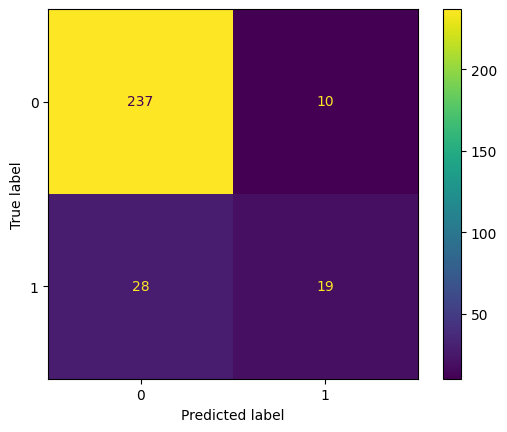

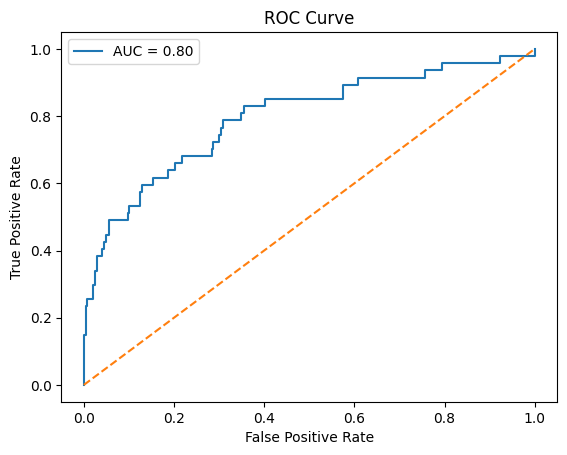

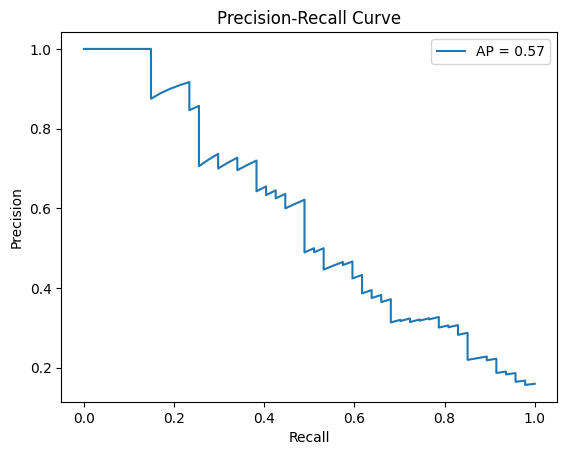

,feature,coefficient
25,OverTime,0.825533
30,YearsSinceLastPromotion,0.556481
8,JobRole_Research Director,-0.506830
24,NumCompaniesWorked,0.475748
15,EnvironmentSatisfaction,-0.452130
31,YearsWithCurrManager,-0.406450
22,Age,-0.393363
5,JobRole_Laboratory Technician,0.388894
18,JobSatisfaction,-0.380968
29,YearsInCurrentRole,-0.362930


In [404]:
# Baseline Model without SMOTE()

Pipe_lr = Pipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
    
])

model_metric(Pipe_lr, ['f1_macro','f1','precision', 'recall', 'roc_auc'])

feature_importance_linear(Pipe_lr)

F1_MACRO : 0.6731001091304685 

F1_MACRO (std) : 0.019350231980580567 

F1 : 0.4947504075827981 

F1 (std) : 0.01844793233655175 

PRECISION : 0.38194421156446723 

PRECISION (std) : 0.046665450094165034 

RECALL : 0.6888297872340425 

RECALL (std) : 0.06684376587247526 

ROC_AUC : 0.8228053276433036 

ROC_AUC (std) : 0.010519761155153084 

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       210
           1       0.62      0.35      0.44        84

    accuracy                           0.75       294
   macro avg       0.70      0.63      0.64       294
weighted avg       0.73      0.75      0.73       294



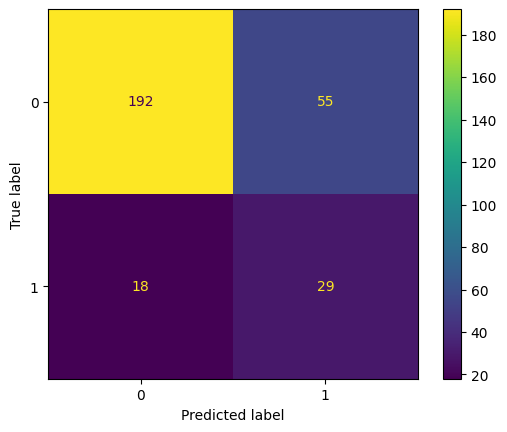

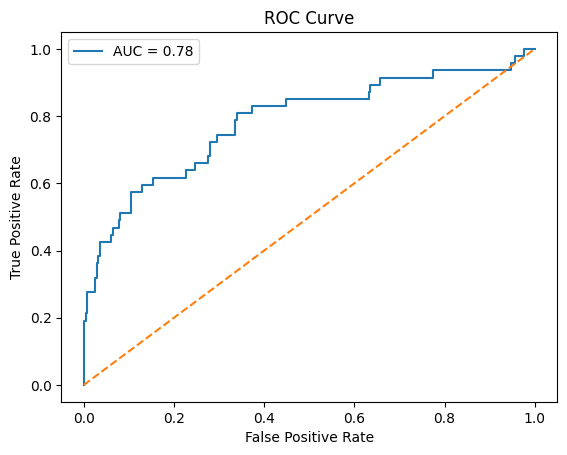

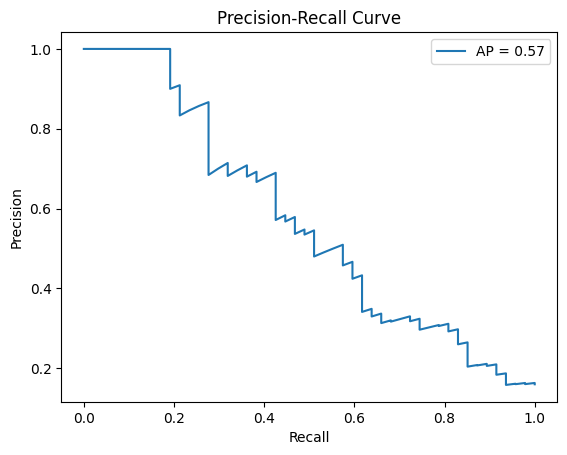

Fitting 4 folds for each of 1080 candidates, totalling 4320 fits
Best params: {'lr__C': 0.1, 'lr__class_weight': None, 'lr__max_iter': 500, 'lr__penalty': 'l1', 'lr__solver': 'saga'}
Best F1: 0.6838307949373051
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       247
           1       0.36      0.68      0.47        47

    accuracy                           0.76       294
   macro avg       0.64      0.73      0.66       294
weighted avg       0.84      0.76      0.78       294



,feature,coefficient
8,JobRole_Research Director,-0.942911
25,OverTime,0.850521
17,JobLevel,0.601375
24,NumCompaniesWorked,0.577462
27,TotalWorkingYears,-0.529289
4,JobRole_Human Resources,0.528671
11,JobRole_Sales Representative,0.516570
30,YearsSinceLastPromotion,0.472228
15,EnvironmentSatisfaction,-0.455969
18,JobSatisfaction,-0.453741


In [405]:
Pipe_lr_balanced = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('lr', LogisticRegression(random_state=42))
    
])

param_grid_lr = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10],
    'lr__penalty': ['l1', 'l2', 'elasticnet'],
    'lr__class_weight': [None, 'balanced'],
    'lr__solver' :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] ,
    'lr__max_iter' : [100, 200, 300, 400, 500, 600],
}

scoring = {
    'f1_macro': 'f1_macro',
    'f1_pos': make_scorer(f1_score, pos_label=1),
    'recall_pos': make_scorer(recall_score, pos_label=1)
}

grid_lr = GridSearchCV(
    estimator=Pipe_lr_balanced,
    param_grid=param_grid_lr,
    cv=cv,
    scoring=scoring,
    refit='f1_macro',
    n_jobs=-1,
    verbose=2
)

model_metric(Pipe_lr_balanced, ['f1_macro','f1','precision', 'recall', 'roc_auc'])

lr_fit = grid_search(grid_lr)

lr_best_params = grid_lr.best_params_

lr_clean_params = {k.split('__')[1]: v for k, v in lr_best_params.items()}

feature_importance_linear(Pipe_lr_balanced)



F1_MACRO : 0.6719984518373081 

F1_MACRO (std) : 0.011174159986539143 

F1 : 0.49903325953800093 

F1 (std) : 0.024244961200652983 

PRECISION : 0.3739451234202861 

PRECISION (std) : 0.027364158794920195 

RECALL : 0.7047872340425532 

RECALL (std) : 0.04987539330825407 

ROC_AUC : 0.8209700110167071 

ROC_AUC (std) : 0.006426443963698216 

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       200
           1       0.70      0.35      0.47        94

    accuracy                           0.74       294
   macro avg       0.73      0.64      0.65       294
weighted avg       0.74      0.74      0.72       294



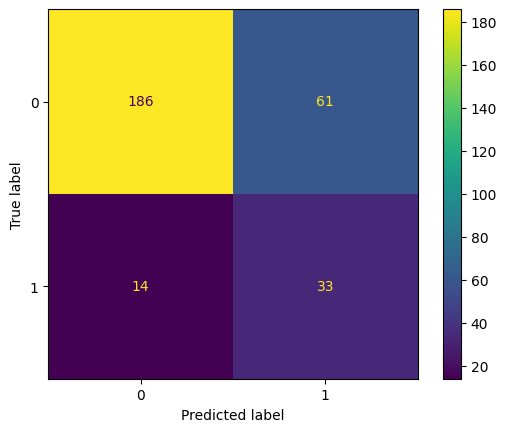

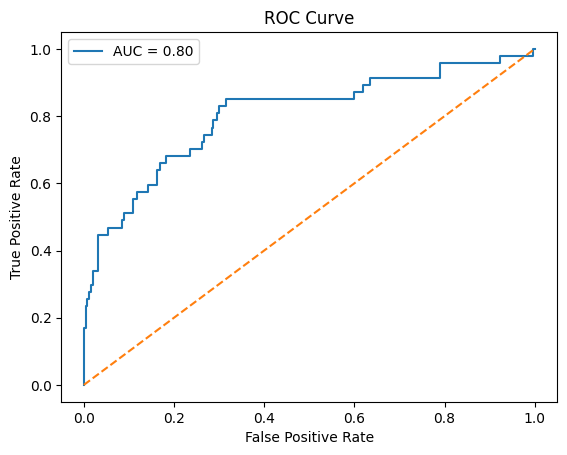

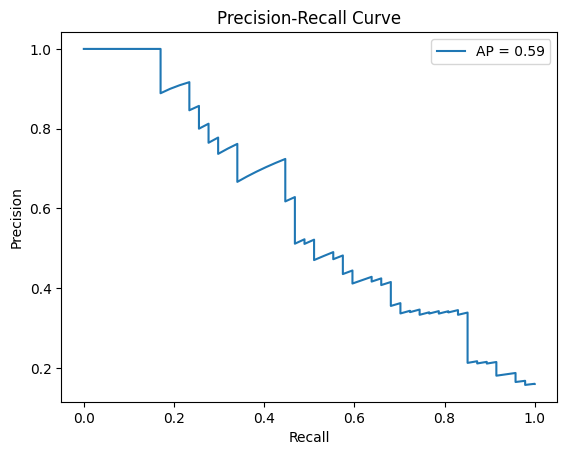

In [406]:
final_lr = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('lr', LogisticRegression(**lr_clean_params, random_state=42))
    
])

model_metric(final_lr, ['f1_macro','f1','precision', 'recall', 'roc_auc'])

#### Random Forest Classifier

F1_MACRO : 0.6339400118565763 

F1_MACRO (std) : 0.014961423610389026 

F1 : 0.34379800307219666 

F1 (std) : 0.02783028451154881 

PRECISION : 0.8038690476190476 

PRECISION (std) : 0.13988823435959474 

RECALL : 0.2208554964539007 

RECALL (std) : 0.021484227638320638 

ROC_AUC : 0.7907642349665162 

ROC_AUC (std) : 0.02196871403359471 

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       285
           1       0.09      0.44      0.14         9

    accuracy                           0.84       294
   macro avg       0.53      0.65      0.53       294
weighted avg       0.95      0.84      0.89       294



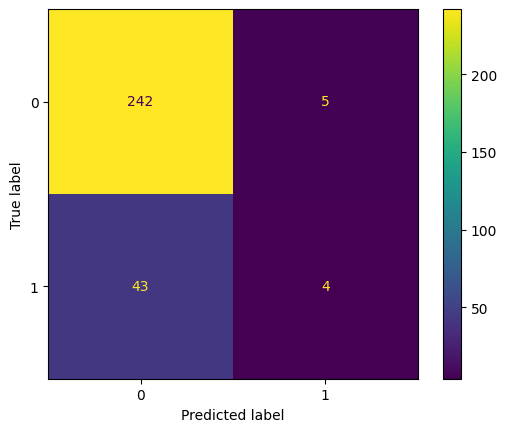

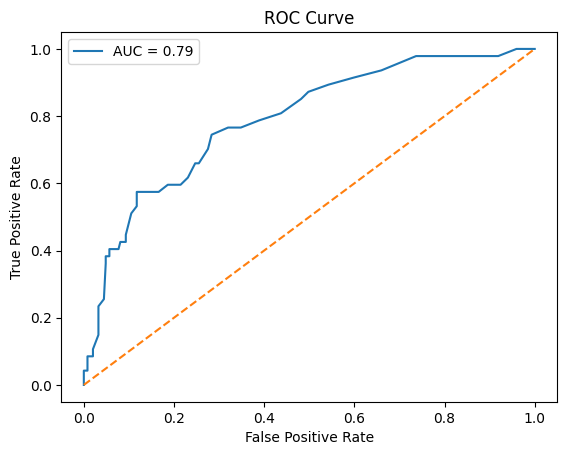

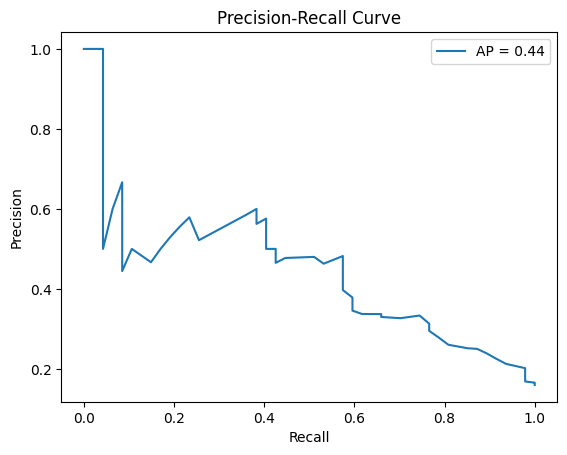

,feature,coefficient
22,Age,0.091410
27,TotalWorkingYears,0.074439
23,DistanceFromHome,0.069236
26,PercentSalaryHike,0.057788
31,YearsWithCurrManager,0.055108
25,OverTime,0.048245
32,Loyalty,0.044826
24,NumCompaniesWorked,0.044356
15,EnvironmentSatisfaction,0.044163
29,YearsInCurrentRole,0.042197


In [407]:
Pipe_rf = Pipeline([
    
    ('Preprocessors', preprocessors),
    ('model', RandomForestClassifier(random_state=42))
    
])

model_metric(Pipe_rf, ['f1_macro', 'f1', 'precision', 'recall', 'roc_auc'])

feature_importance_tree(Pipe_rf)

F1_MACRO : 0.6843672875570885 

F1_MACRO (std) : 0.039760592493939956 

F1 : 0.4082593177855275 

F1 (std) : 0.07945937583733056 

PRECISION : 0.8057644110275689 

PRECISION (std) : 0.12919428780029762 

RECALL : 0.29443705673758863 

RECALL (std) : 0.030363272958378228 

ROC_AUC : 0.7896785942277169 

ROC_AUC (std) : 0.018284360976684563 

              precision    recall  f1-score   support

           0       0.98      0.88      0.92       275
           1       0.28      0.68      0.39        19

    accuracy                           0.86       294
   macro avg       0.63      0.78      0.66       294
weighted avg       0.93      0.86      0.89       294



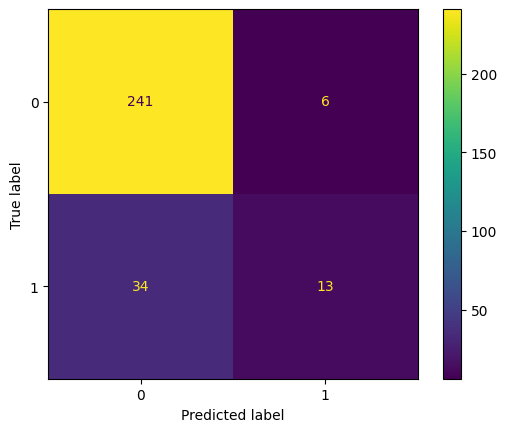

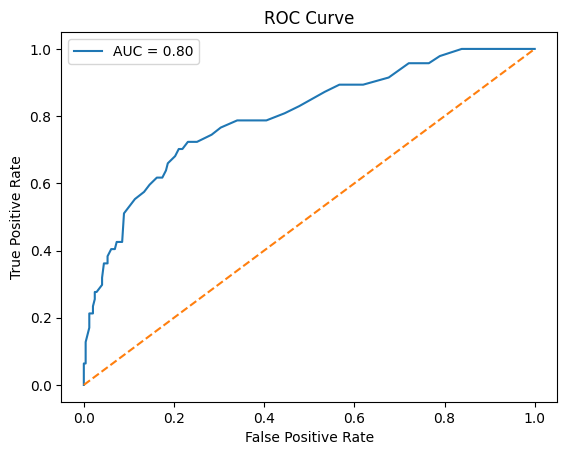

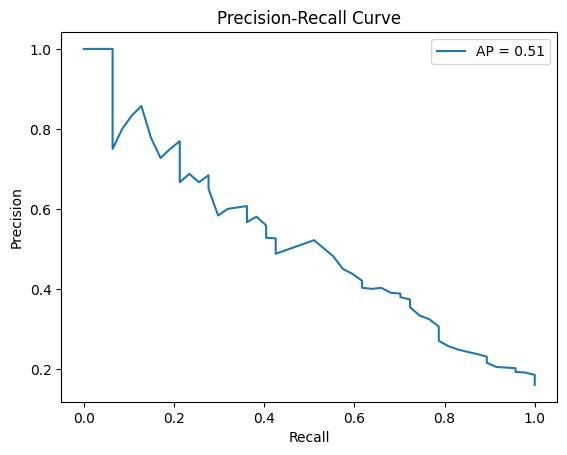

Fitting 4 folds for each of 648 candidates, totalling 2592 fits
Best params: {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 15, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best F1: 0.7141422002329917
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.63      0.26      0.36        47

    accuracy                           0.86       294
   macro avg       0.75      0.61      0.64       294
weighted avg       0.83      0.86      0.83       294



,feature,coefficient
25,OverTime,0.140087
14,MaritalStatus_Single,0.069216
17,JobLevel,0.052952
20,StockOptionLevel,0.051089
22,Age,0.045562
13,MaritalStatus_Married,0.043938
31,YearsWithCurrManager,0.042801
27,TotalWorkingYears,0.040573
18,JobSatisfaction,0.037020
5,JobRole_Laboratory Technician,0.036903


In [408]:
Pipe_rf_balanced = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('smote', SMOTE()),
    ('model', RandomForestClassifier(random_state=42))
    
])

param_grid_rf = {
    'model__class_weight' : [None, 'balanced', 'balanced_subsample'],
    'model__n_estimators' : [100, 200, 300],
    'model__max_depth' : [10, 15, 20],
    'model__criterion' : ['gini', 'entropy', 'log_loss'],
    'model__min_samples_split' : [2, 3, 4, 5],
    'model__min_samples_leaf' : [1, 2]
}

grid_rf = GridSearchCV(
    estimator=Pipe_rf_balanced,
    param_grid=param_grid_rf,
    cv=cv,
    scoring=scoring,
    refit='f1_macro',
    n_jobs=-1,
    verbose=2,
    error_score= 'raise'
)

model_metric(Pipe_rf_balanced, ['f1_macro', 'f1', 'precision', 'recall', 'roc_auc'])

rf_fit = grid_search(grid_rf)

rf_best_params = grid_rf.best_params_

rf_clean_params = {k.split('__')[1]: v for k, v in rf_best_params.items()}

feature_importance_tree(Pipe_rf_balanced)



F1_MACRO : 0.6763570819246205 

F1_MACRO (std) : 0.030610855749099112 

F1 : 0.49077850762867964 

F1 (std) : 0.028619266204039737 

PRECISION : 0.3833131502532651 

PRECISION (std) : 0.039496990351245403 

RECALL : 0.72052304964539 

RECALL (std) : 0.05295965657423149 

ROC_AUC : 0.8168247593622461 

ROC_AUC (std) : 0.010945699796656251 

              precision    recall  f1-score   support

           0       0.77      0.92      0.83       206
           1       0.64      0.34      0.44        88

    accuracy                           0.74       294
   macro avg       0.70      0.63      0.64       294
weighted avg       0.73      0.74      0.72       294



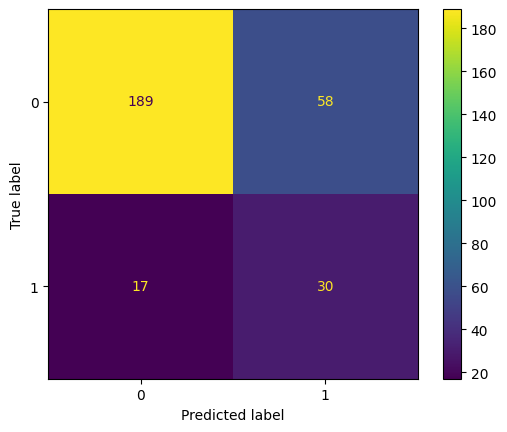

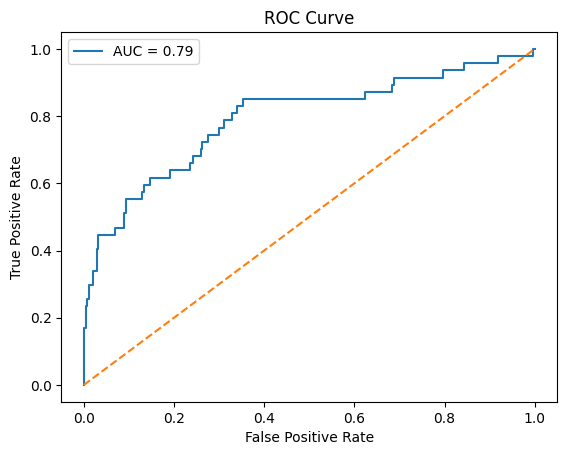

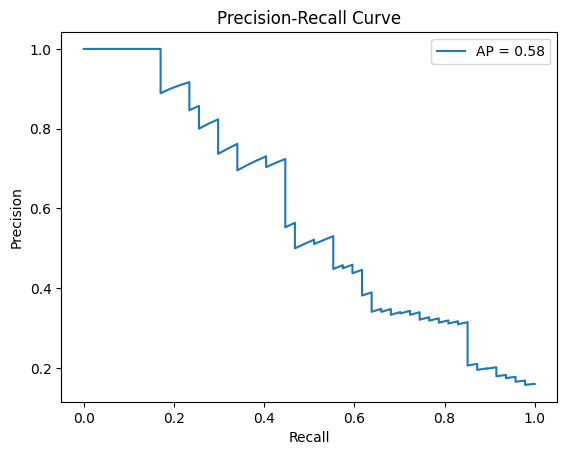

In [409]:
# Final RandomForestClassifier Model

final_rf = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('lr', RandomForestClassifier(**rf_clean_params, random_state=42))
    
])

model_metric(final_lr, ['f1_macro','f1','precision', 'recall', 'roc_auc'])


#### XGBoost Classifier

##### Baseline Model

F1_MACRO : 0.6848437855777461 

F1_MACRO (std) : 0.03802038051837049 

F1 : 0.4501353909248646 

F1 (std) : 0.06373005447232992 

PRECISION : 0.6309523809523809 

PRECISION (std) : 0.13521210347143509 

RECALL : 0.3525044326241135 

RECALL (std) : 0.041576236134840704 

ROC_AUC : 0.7740234100067441 

ROC_AUC (std) : 0.018228507092616156 

              precision    recall  f1-score   support

           0       0.97      0.89      0.92       270
           1       0.34      0.67      0.45        24

    accuracy                           0.87       294
   macro avg       0.65      0.78      0.69       294
weighted avg       0.92      0.87      0.89       294



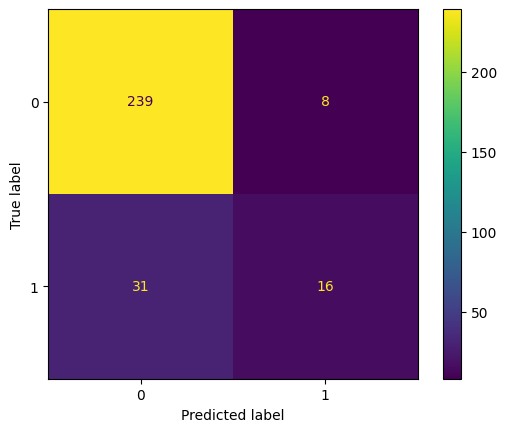

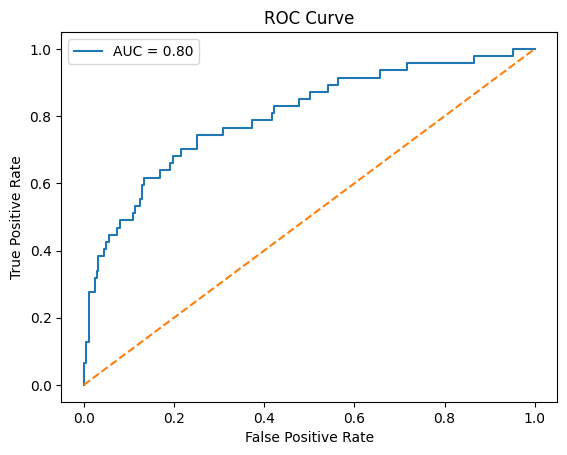

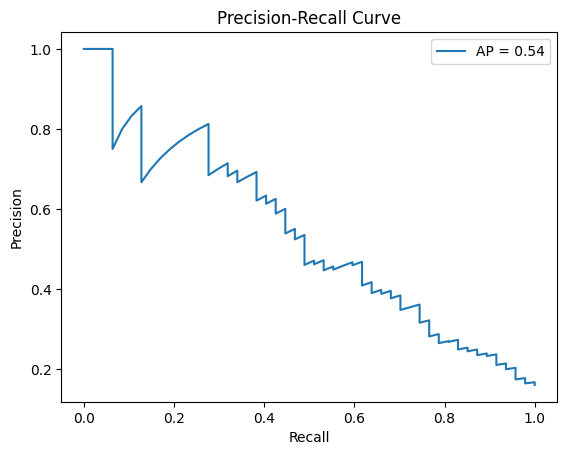

,feature,coefficient
2,Department_Sales,0.069767
9,JobRole_Research Scientist,0.066150
25,OverTime,0.062992
6,JobRole_Manager,0.048842
27,TotalWorkingYears,0.043287
20,StockOptionLevel,0.043170
12,MaritalStatus_Divorced,0.042473
17,JobLevel,0.041862
24,NumCompaniesWorked,0.037902
31,YearsWithCurrManager,0.034880


In [410]:
Pipe_xgbc = Pipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(random_state=42))
    
])

model_metric(Pipe_xgbc, ['f1_macro', 'f1','precision', 'recall', 'roc_auc'])

feature_importance_tree(Pipe_xgbc)

##### XGBClassifier Balanced

F1_MACRO : 0.7090502072011114 

F1_MACRO (std) : 0.056914487091556804 

F1 : 0.49222336447708526 

F1 (std) : 0.08273983058163016 

PRECISION : 0.5236400151351981 

PRECISION (std) : 0.090670109757297 

RECALL : 0.4207668439716312 

RECALL (std) : 0.07621624549928906 

ROC_AUC : 0.7770192064766823 

ROC_AUC (std) : 0.023979357067752487 

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       257
           1       0.45      0.57      0.50        37

    accuracy                           0.86       294
   macro avg       0.69      0.73      0.71       294
weighted avg       0.87      0.86      0.86       294



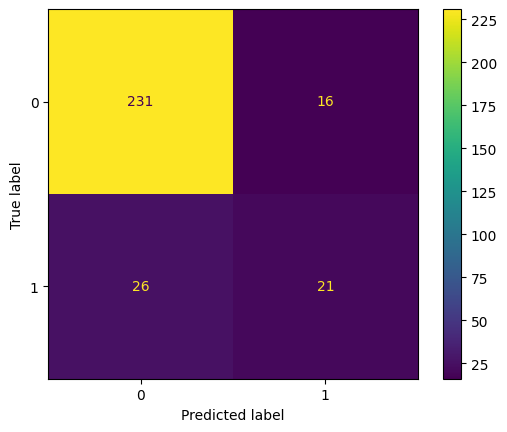

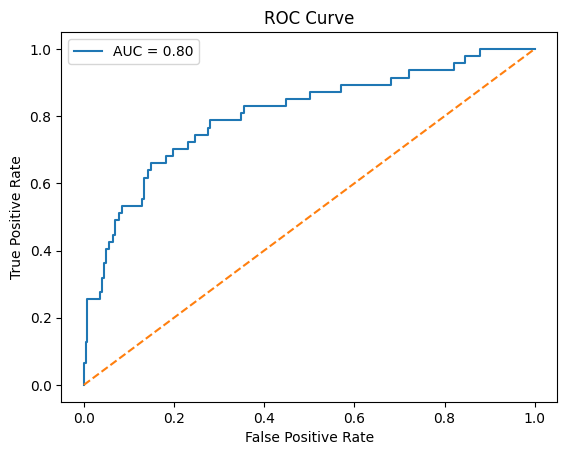

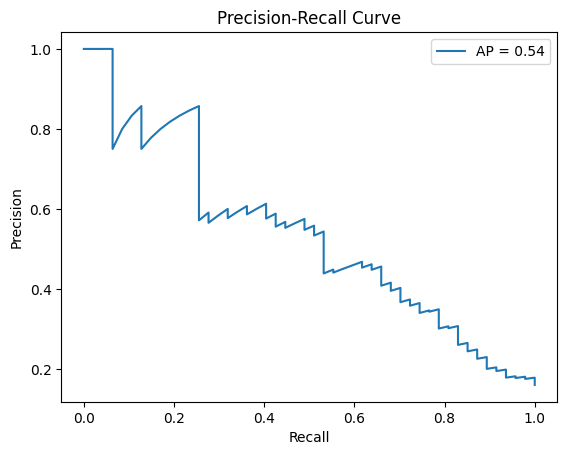

Fitting 4 folds for each of 108 candidates, totalling 432 fits


KeyboardInterrupt: 

In [411]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

Pipe_xgbc_balanced = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('model', XGBClassifier(random_state=42,scale_pos_weight=scale_pos_weight))
    
])

param_grid_xgbc = {
    'model__max_depth' : [10, 15, 20],
    'model__learning_rate' : [0.01,0.1] ,
    'model__n_estimators' : [100, 200, 300],
    'model__eval_metric' : ['logloss', 'auc', 'error'],
    'model__subsample' : [0.5],
    'model__gamma' : [0, 1]
}

grid_xgbc = GridSearchCV(
    estimator=Pipe_xgbc_balanced,
    param_grid=param_grid_xgbc,
    cv=cv,
    scoring=scoring,
    refit='f1_macro',
    n_jobs=-1,
    verbose=2,
    error_score= 'raise'
)

model_metric(Pipe_xgbc_balanced, ['f1_macro','f1', 'precision', 'recall', 'roc_auc'])

xgbc_fit = grid_search(grid_xgbc)

xgbc_best_params = grid_xgbc.best_params_

xgbc_clean_params = {k.split('__')[1]: v for k, v in xgbc_best_params.items()}

feature_importance_tree(Pipe_xgbc_balanced)



F1_MACRO : 0.7010861926091685 

F1_MACRO (std) : 0.047695922601178005 

F1 : 0.4909138345496682 

F1 (std) : 0.0688261467413288 

PRECISION : 0.5021163120924919 

PRECISION (std) : 0.05575175616370863 

RECALL : 0.5310283687943262 

RECALL (std) : 0.05696568732772111 

ROC_AUC : 0.7907591539575056 

ROC_AUC (std) : 0.021776099901110554 

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       243
           1       0.57      0.53      0.55        51

    accuracy                           0.85       294
   macro avg       0.74      0.72      0.73       294
weighted avg       0.85      0.85      0.85       294



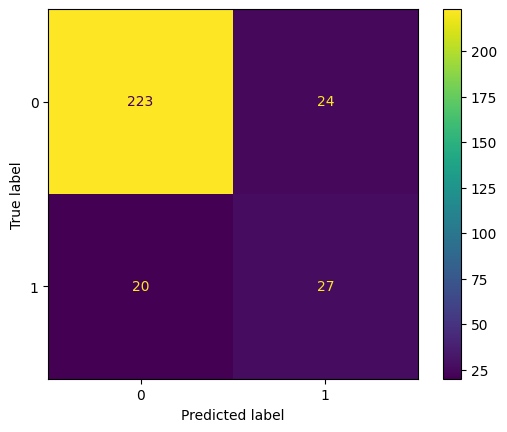

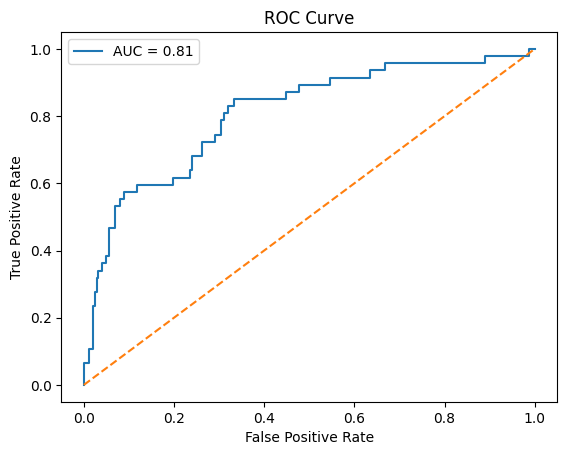

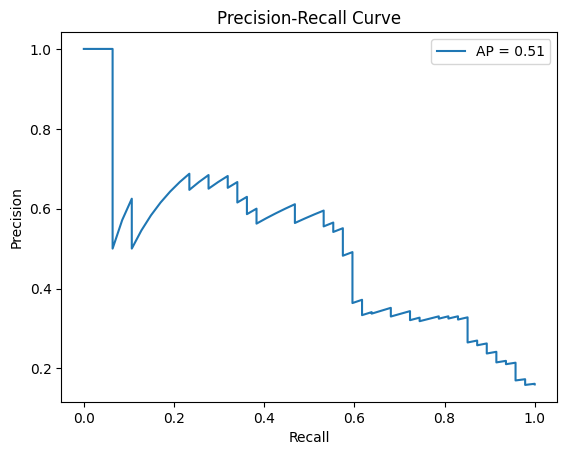

In [427]:
final_xgbc = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('model', XGBClassifier(random_state=42,scale_pos_weight=scale_pos_weight,**xgbc_clean_params))
    
])

model_metric(final_xgbc, ['f1_macro', 'f1','precision', 'recall', 'roc_auc'])

#### LightGBM Classifier

[LightGBM] [Info] Number of positive: 143, number of negative: 739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 352
[LightGBM] [Info] Number of data points in the train set: 882, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.162132 -> initscore=-1.642453
[LightGBM] [Info] Start training from score -1.642453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 143, number of negative: 739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[Light

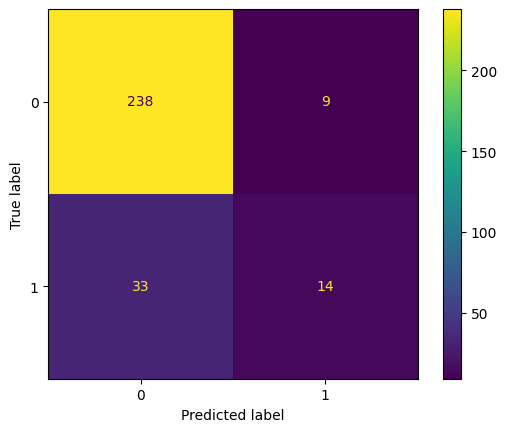

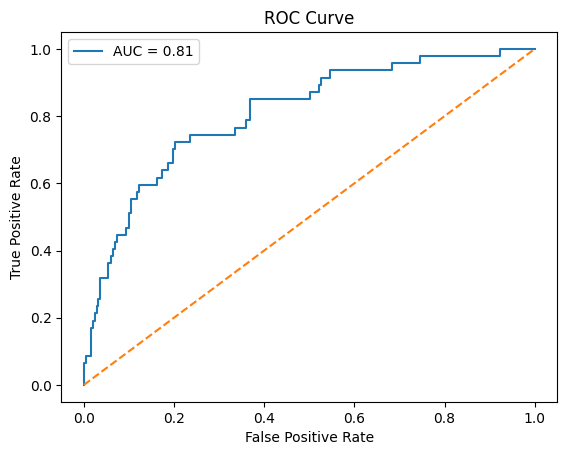

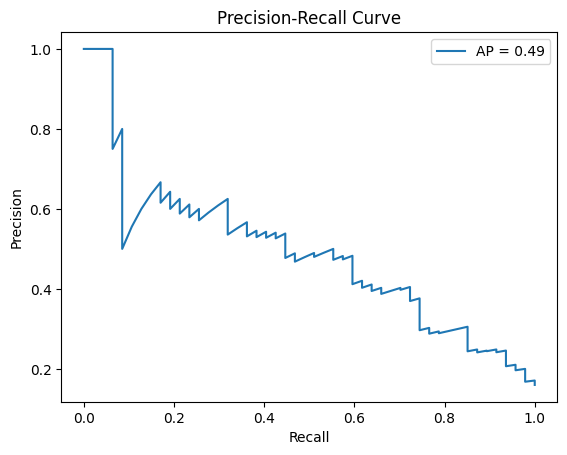

,feature,coefficient
22,Age,328
23,DistanceFromHome,269
27,TotalWorkingYears,211
32,Loyalty,198
26,PercentSalaryHike,191
31,YearsWithCurrManager,158
18,JobSatisfaction,135
24,NumCompaniesWorked,131
28,TrainingTimesLastYear,125
30,YearsSinceLastPromotion,122


In [ ]:
Pipe_lgbm = Pipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('model', LGBMClassifier(random_state=42))
    
])

model_metric(Pipe_lgbm, ['f1_macro','f1','precision', 'recall', 'roc_auc'])

feature_importance_tree(Pipe_lgbm)

[LightGBM] [Info] Number of positive: 739, number of negative: 739
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3906
[LightGBM] [Info] Number of data points in the train set: 1478, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 739, number of negative: 739
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000712 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3935
[LightGBM] [Info] Number of data points in the train set: 1478, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 740, number of negative: 740
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the ove

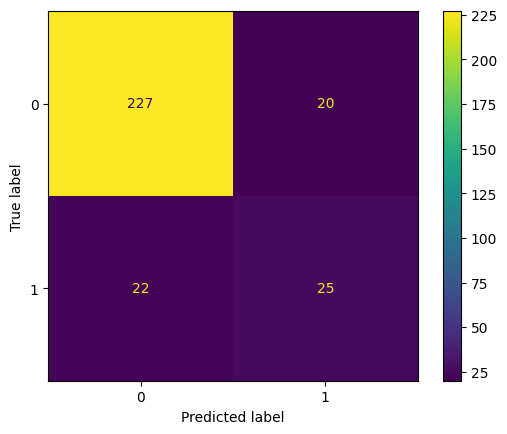

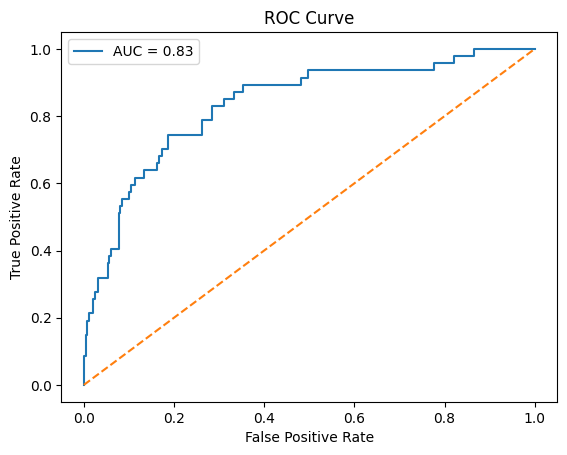

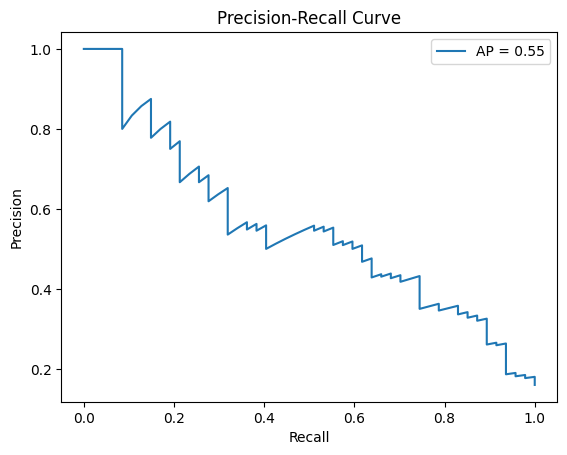

Fitting 4 folds for each of 108 candidates, totalling 432 fits
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Number of positive: 986, number of negative: 986
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011684 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4109
[LightGBM] [Info] Number of data points in the train set: 1972, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: gamma
Best params: {'model__eval_metric': 'auc', 'model__gamma': 0, 'model__learning_rate': 0.1, 'model__max_depth': 15, 'model__n_estimators': 100, 'model__subsample': 0.5}
Best F1: 0.716536508759577
              

,feature,coefficient
22,Age,242
23,DistanceFromHome,211
18,JobSatisfaction,170
15,EnvironmentSatisfaction,166
26,PercentSalaryHike,162
19,RelationshipSatisfaction,161
27,TotalWorkingYears,160
31,YearsWithCurrManager,152
21,WorkLifeBalance,150
28,TrainingTimesLastYear,141


In [ ]:
Pipe_lgbm_balanced = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('model', LGBMClassifier(random_state=42,scale_pos_weight=scale_pos_weight))
    
])

param_grid_lgbm = {
    'model__max_depth' : [10, 15, 20],
    'model__learning_rate' : [0.01,0.1] ,
    'model__n_estimators' : [100, 200, 300],
    'model__eval_metric' : ['logloss', 'auc', 'error'],
    'model__subsample' : [0.5],
    'model__gamma' : [0, 1]
}

grid_lgbm = GridSearchCV(
    estimator=Pipe_lgbm_balanced,
    param_grid=param_grid_lgbm,
    cv=cv,
    scoring=scoring,
    refit='f1_macro',
    n_jobs=-1,
    verbose=-1,
    error_score= 'raise'
)

model_metric(Pipe_lgbm_balanced, ['f1_macro','f1', 'precision', 'recall', 'roc_auc'])

lgbm_fit = grid_search(grid_lgbm)

lgbm_best_params = grid_lgbm.best_params_

lgbm_clean_params = {k.split('__')[1]: v for k, v in lgbm_best_params.items()}

feature_importance_tree(Pipe_lgbm_balanced)




F1_MACRO : 0.7172660423271003 

F1_MACRO (std) : 0.028680161595043833 

F1 : 0.5138320603746136 

F1 (std) : 0.041831695945808184 

PRECISION : 0.5695816572394412 

PRECISION (std) : 0.10208467492240955 

RECALL : 0.49922429078014174 

RECALL (std) : 0.09767494932510297 

ROC_AUC : 0.7983852159431017 

ROC_AUC (std) : 0.02229555232586664 

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       248
           1       0.55      0.57      0.56        46

    accuracy                           0.86       294
   macro avg       0.74      0.74      0.74       294
weighted avg       0.86      0.86      0.86       294



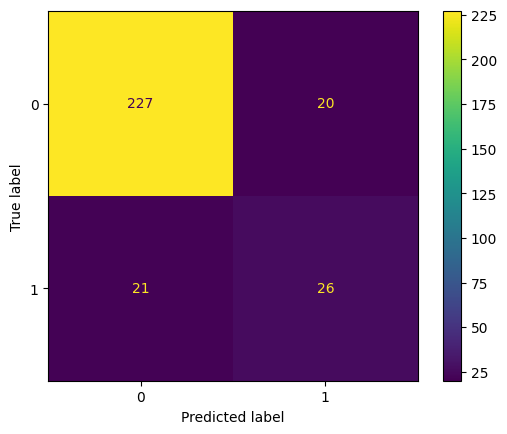

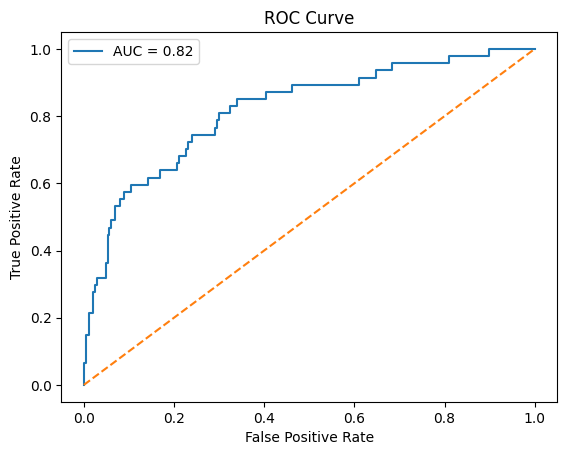

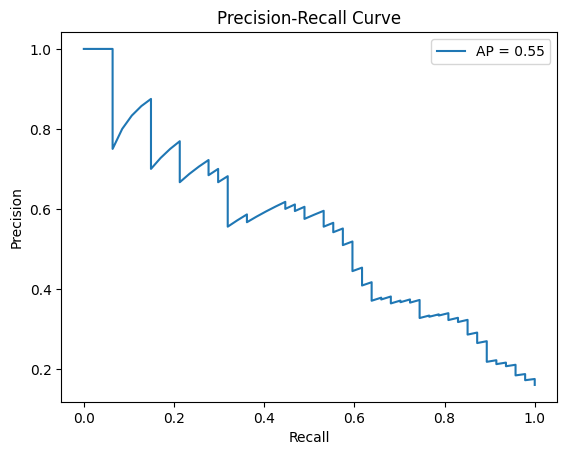

In [ ]:
final_lgbm = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('lgbm', XGBClassifier(random_state=42,scale_pos_weight=scale_pos_weight,**lgbm_clean_params))
    
])

model_metric(final_lgbm, ['f1_macro','f1','precision', 'recall', 'roc_auc'])

#### Support Vector Classifier

F1_MACRO : 0.7044101452121287 

F1_MACRO (std) : 0.027888513305128853 

F1 : 0.4828164228986177 

F1 (std) : 0.05335170183812757 

PRECISION : 0.7107526881720431 

PRECISION (std) : 0.13608417953431717 

RECALL : 0.3782136524822695 

RECALL (std) : 0.07049361921069747 

ROC_AUC : 0.8347364559777586 

ROC_AUC (std) : 0.014937330021369325 

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       267
           1       0.38      0.67      0.49        27

    accuracy                           0.87       294
   macro avg       0.67      0.78      0.71       294
weighted avg       0.91      0.87      0.89       294



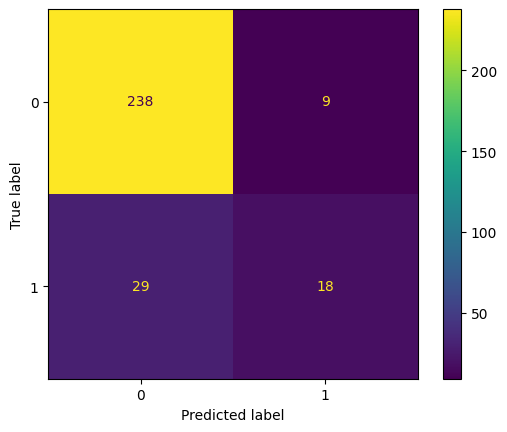

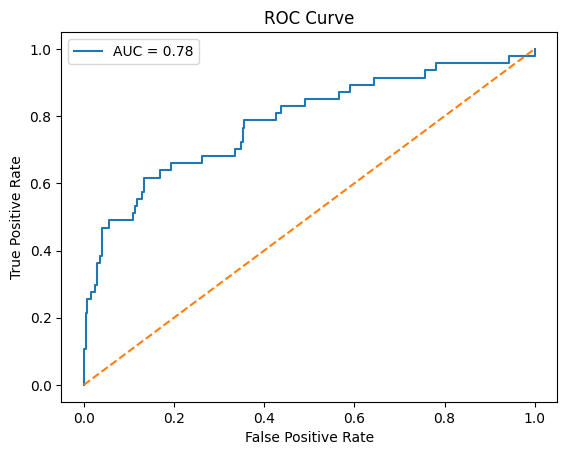

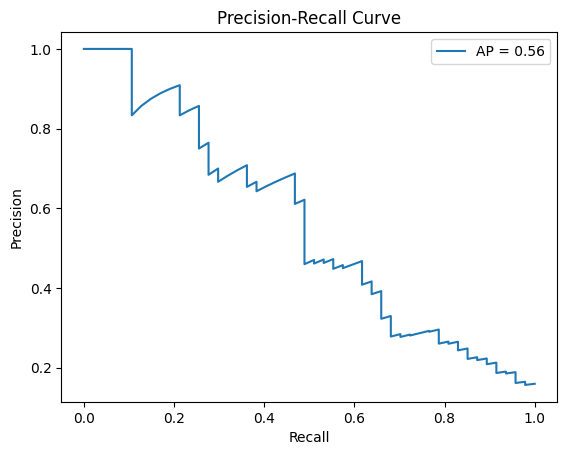

,feature,coefficient
25,OverTime,0.531835
24,NumCompaniesWorked,0.366400
30,YearsSinceLastPromotion,0.346870
31,YearsWithCurrManager,-0.311057
22,Age,-0.304931
29,YearsInCurrentRole,-0.302640
15,EnvironmentSatisfaction,-0.297341
8,JobRole_Research Director,-0.281586
11,JobRole_Sales Representative,0.264039
16,JobInvolvement,-0.252083


In [ ]:
Pipe_svc = Pipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('lr', SVC(random_state=42, probability=True, kernel='linear'))
    
])

model_metric(Pipe_svc, ['f1_macro', 'f1','precision', 'recall', 'roc_auc'])

feature_importance_linear(Pipe_svc)

F1_MACRO : 0.6877006417324654 

F1_MACRO (std) : 0.015964084287702383 

F1 : 0.45965703502363187 

F1 (std) : 0.03293458053337126 

PRECISION : 0.4567861865131835 

PRECISION (std) : 0.03892342985803055 

RECALL : 0.49922429078014185 

RECALL (std) : 0.07405956883497965 

ROC_AUC : 0.7731491846545329 

ROC_AUC (std) : 0.012784561976567884 

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       236
           1       0.51      0.41      0.46        58

    accuracy                           0.81       294
   macro avg       0.69      0.66      0.67       294
weighted avg       0.79      0.81      0.80       294



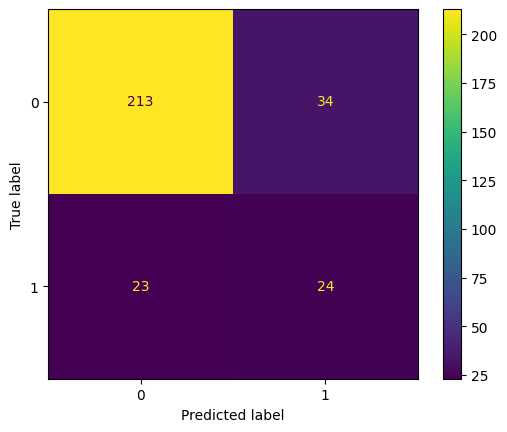

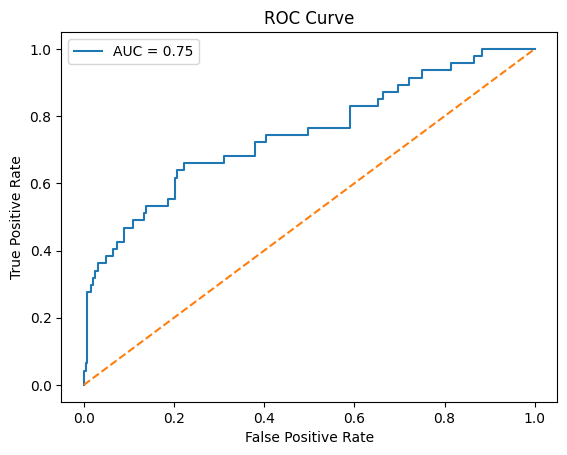

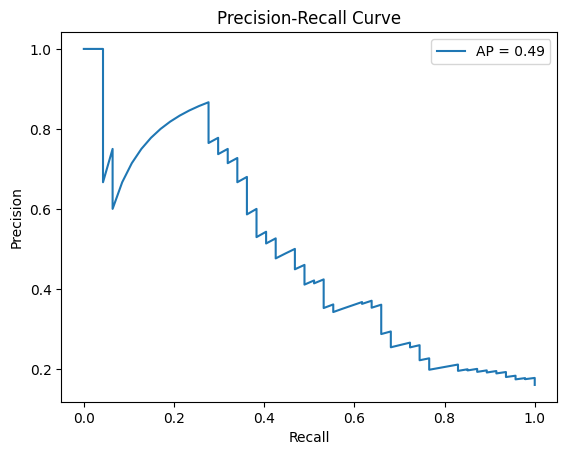

Fitting 4 folds for each of 300 candidates, totalling 1200 fits
Best params: {'model__C': 0.001, 'model__class_weight': None, 'model__gamma': 0.3, 'model__kernel': 'poly', 'model__max_iter': 500}
Best F1: 0.7054274317317328
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       247
           1       0.39      0.57      0.47        47

    accuracy                           0.79       294
   macro avg       0.65      0.70      0.67       294
weighted avg       0.83      0.79      0.80       294



In [ ]:
Pipe_svc_balanced = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('model', SVC(random_state=42, probability=True))
    
])

param_grid_svc = {
    'model__C': [0.001, 0.01, 0.1, 1, 10],
    'model__class_weight': [None, 'balanced'],
    'model__max_iter' : [100, 200, 300, 400, 500, 600],
    'model__gamma' : [0.3],
    'model__kernel' : ['linear','poly', 'rbf', 'sigmoid', 'precomputed']
}

scoring = {
    'f1_macro' : 'f1_macro',
    'f1_pos': make_scorer(f1_score, pos_label=1),
    'recall_pos': make_scorer(recall_score, pos_label=1)
}

grid_svc = GridSearchCV(
    estimator=Pipe_svc_balanced,
    param_grid=param_grid_svc,
    cv=cv,
    scoring=scoring,
    refit='f1_macro',
    n_jobs=-1,
    verbose=2
)

model_metric(Pipe_svc_balanced, ['f1_macro','f1','precision', 'recall', 'roc_auc'])

svc_fit = grid_search(grid_svc)

svc_best_params = grid_svc.best_params_

svc_clean_params = {k.split('__')[1]: v for k, v in svc_best_params.items()}


F1_MACRO : 0.6881232112227802 

F1_MACRO (std) : 0.014735735351047928 

F1 : 0.4830985538565283 

F1 (std) : 0.03344653689482068 

RECALL : 0.49412677304964536 

RECALL (std) : 0.06907884174103261 

PRECISION : 0.4698920265780731 

PRECISION (std) : 0.05560490973601348 

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       222
           1       0.57      0.38      0.45        72

    accuracy                           0.78       294
   macro avg       0.70      0.64      0.66       294
weighted avg       0.76      0.78      0.76       294



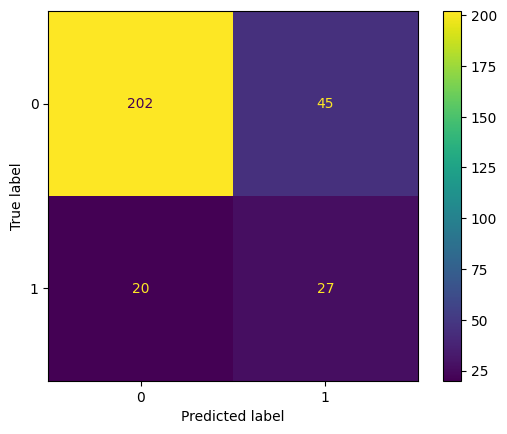

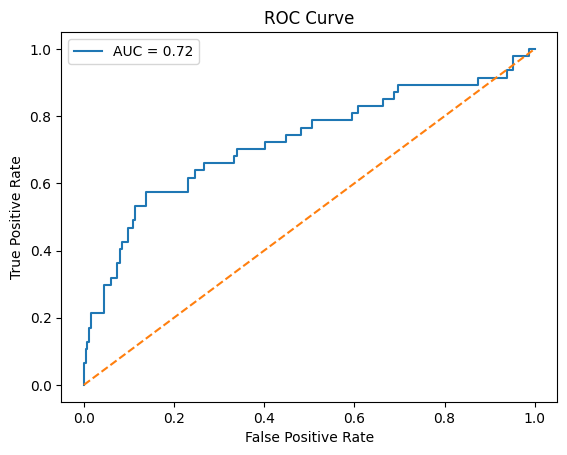

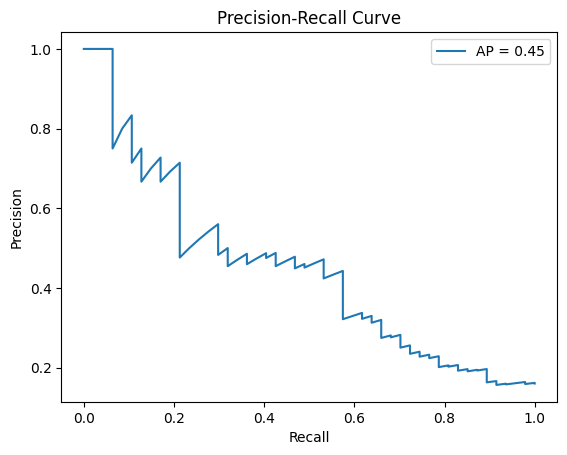

In [ ]:
final_svc = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('svc', SVC(random_state=42, probability=True, **svc_clean_params))
    
])


model_metric(final_svc, ['f1_macro', 'f1', 'recall', 'precision'])


In [ ]:
# Feature overlap 

top_n = 20

models = {'lr': lr_fit[0], 'rf': rf_fit[0], 'xgbc': xgbc_fit[0], 'lgbm': lgbm_fit[0], 'svc' : svc_fit[0]}
importance_dict = {}
top_features = {}

for name, model in models.items():
    r = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=42)
    imp = pd.Series(r.importances_mean, index=x_test.columns)
    top_features[name] = imp.sort_values(ascending=False).head(top_n).index.tolist()
    importance_dict[name] = imp
    
models_list = list(models.keys())
n = len(models_list)
overlap = pd.DataFrame(0.0, index=models_list, columns=models_list)



[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning]

In [ ]:
overlap

,lr,rf,xgbc,lgbm,svc
lr,0.0,0.0,0.0,0.0,0.0
rf,0.0,0.0,0.0,0.0,0.0
xgbc,0.0,0.0,0.0,0.0,0.0
lgbm,0.0,0.0,0.0,0.0,0.0
svc,0.0,0.0,0.0,0.0,0.0


#### Model Ensemble

F1_MACRO : 0.7310013631498463 

F1_MACRO (std) : 0.026396168311206204 

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       235
           1       0.62      0.49      0.55        59

    accuracy                           0.84       294
   macro avg       0.75      0.71      0.72       294
weighted avg       0.83      0.84      0.83       294



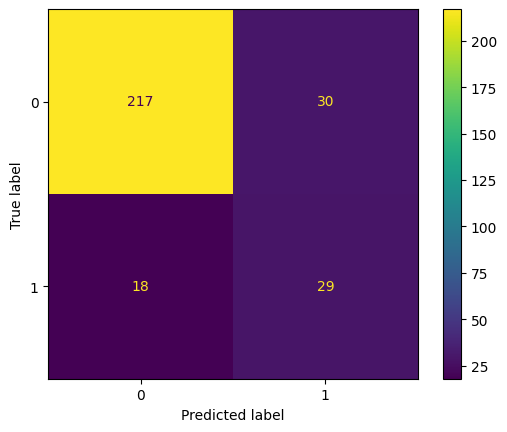

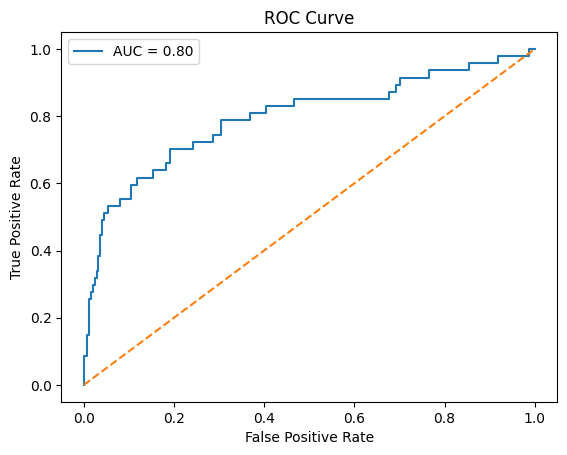

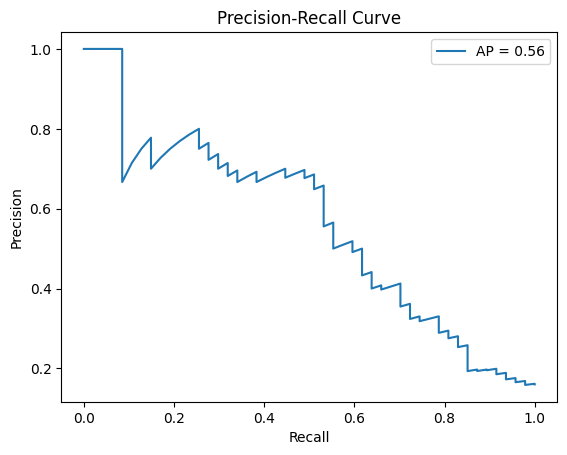

In [ ]:
ensemble = VotingClassifier(
    
    estimators=[
        ('lr', final_lr),
        ('lgbm', final_lgbm),
        ('svc', final_svc)
    ],
    voting='soft'  
)

model_metric(ensemble, ['f1_macro'])